# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Modify the window of the input size

In [1]:
import sys
from pathlib import Path
from datetime import datetime

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    # main,
)

modkit found with expected version 0.2.4


In [2]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

## Extract Extranded window around the 30 bp ROI of unedited primary T cells from Elain ES from nCATs nanopore experiment using P2 on 2004-12-16

## Setting mC threshold in methylation calling confidance to 0.7

# Expend window size

In [4]:
system_info()

experiment_name = "unedited_T_primerES_nCATS"
threshold_mC =  0.7 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'

# region_start = 206586162
# region_end = 206586192

# Expend window size
expand_window_size = 500 #1500 # 0 
expand_window_size
print("Expend window size by 2 * ", expand_window_size)
region_start = 206586162 - expand_window_size
region_end = 206586192 + expand_window_size + 1

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)



System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Expend window size by 2 *  500
region_length 1031
GACATGGATGAAGCTGGAAACCATCAACCTCAGCAAACTAACATAAGACCAGAAAACCAAACACTGCATGTTCTTACTCATAAGTGGGAGTTGAACAATGAGAATACACAGACACAGGGAGGGGAACATCACACACGGGGGCCTGTTGGAGGGTGGGGGTTAGGGGAGGGATAGCATTAGGAGAAATACCTAATGTAGATGTTGGGTTGATGGGTGCAGCAAACCACCATGGCACGTGTATACCTATGTAACAAACCTGCATGTTCTGCACATGTATTCCAGAACTTAAAGAATATATATTTATATATGTATAAATATATATGAATATATAAATATAAATATATATATAAGCTCCCCACGTGATTCTAATGTGTGGCCAGTCTTGCAAACCTCAGGCTATTTATTCTAAAGGGTTTGTAACAAGCCTTCCTCTTAAAATCCACCCCACCACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATTTCTCTCTACAGTCAGTCTGGAGTAATCCCAAAGTGGTGTCTTTCGTAAATAAGGAGAACCCGGGTGAAGAAAATGACTCCCACCCGAACAAGGCATGAACAATGTTCACTCCCTACTGTGTTATTCAACCTGTTTCCCCAGGT

No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 3079 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3079   0% | 00:00<…

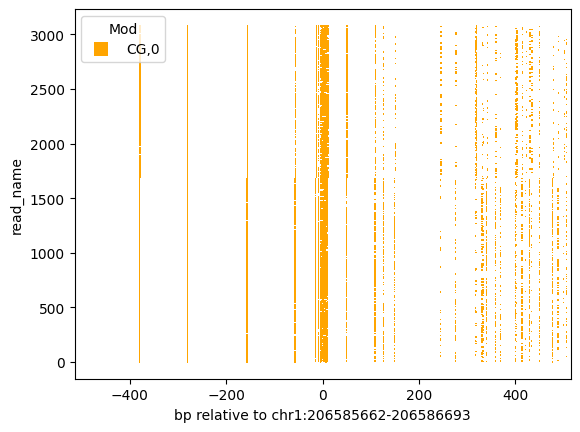

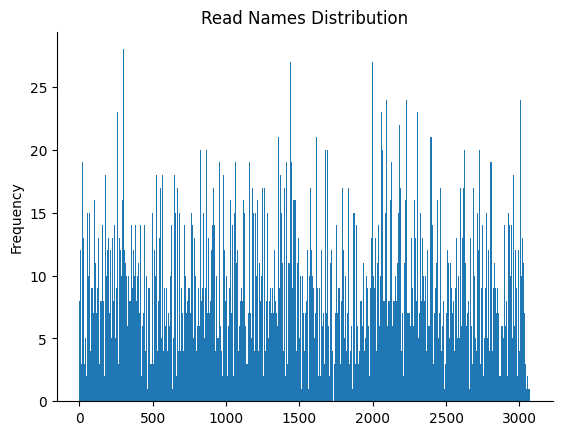

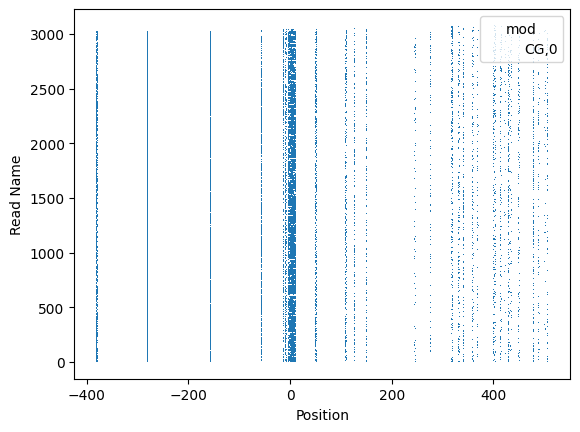

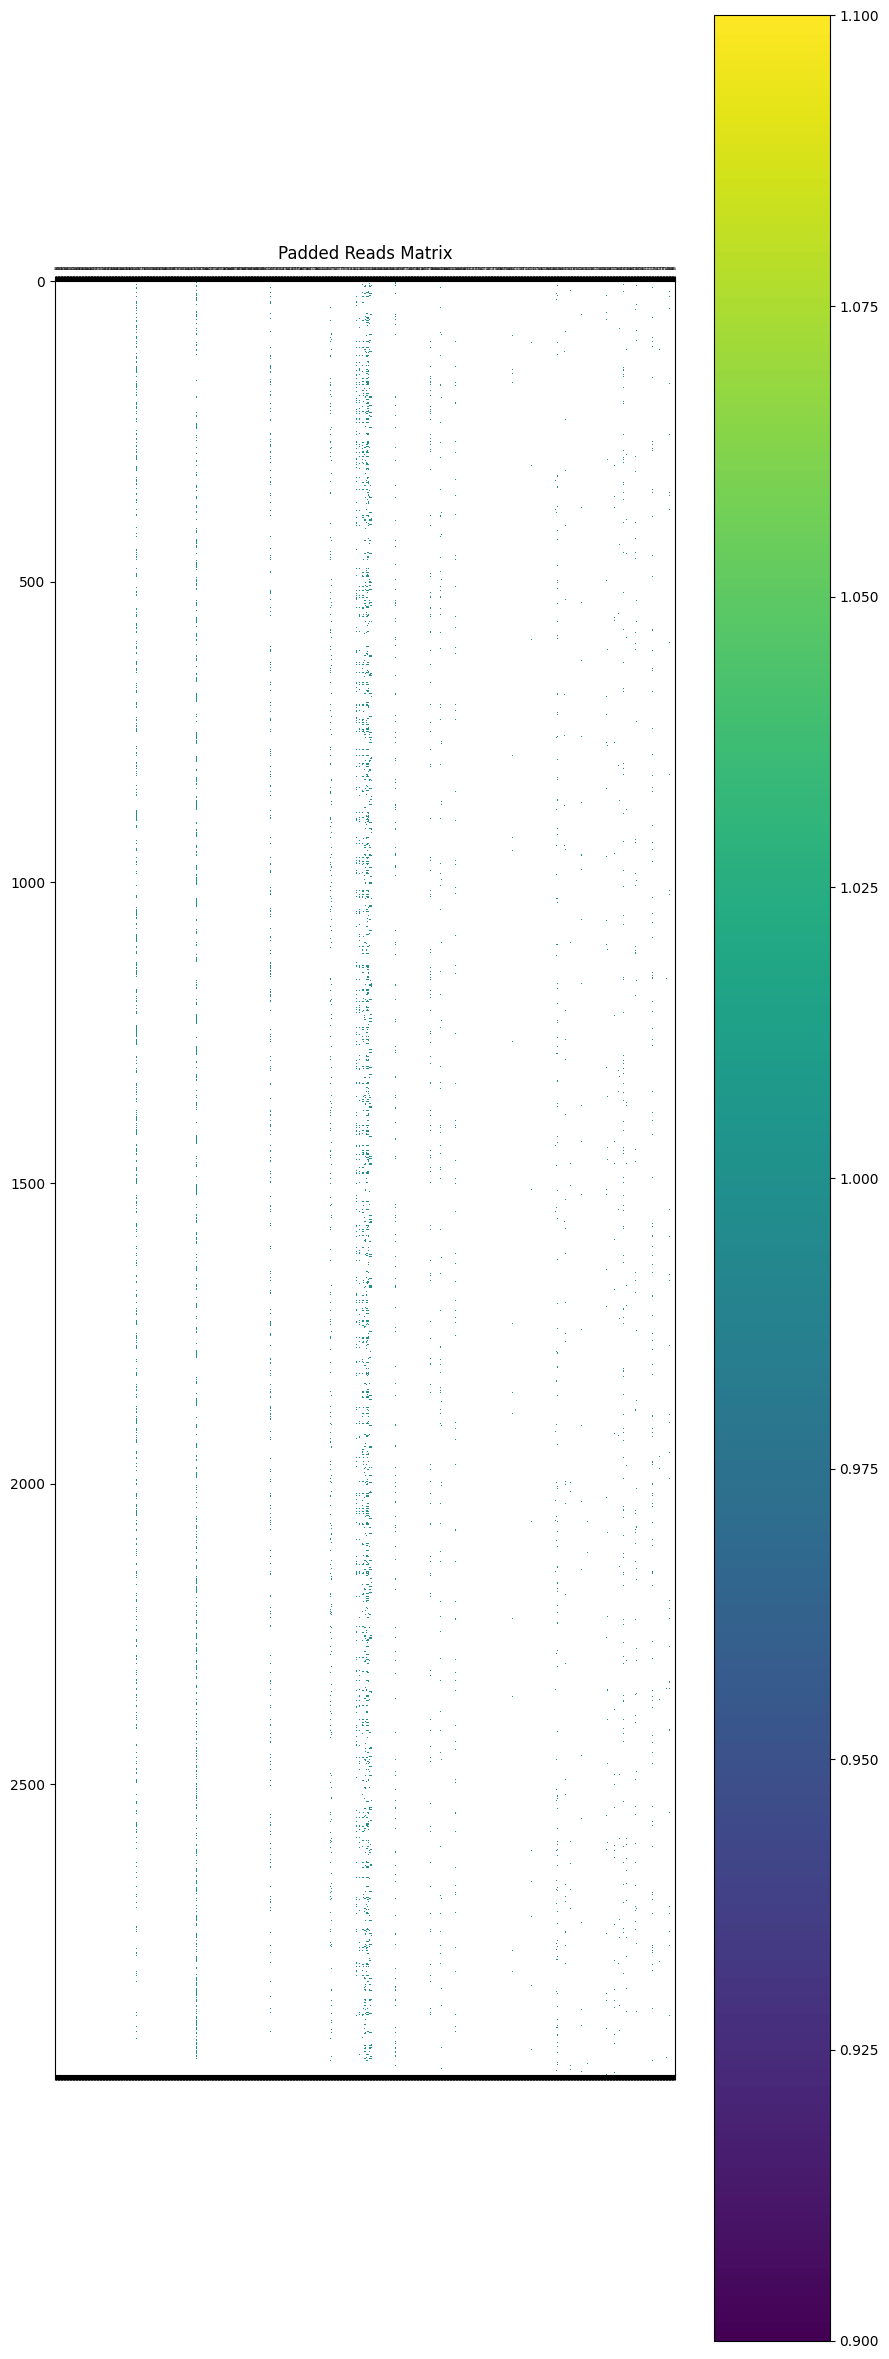

Padded reads saved to padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206585662-206586693_2025-02-25.npy


In [5]:

extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

Padded reads loaded successfully.


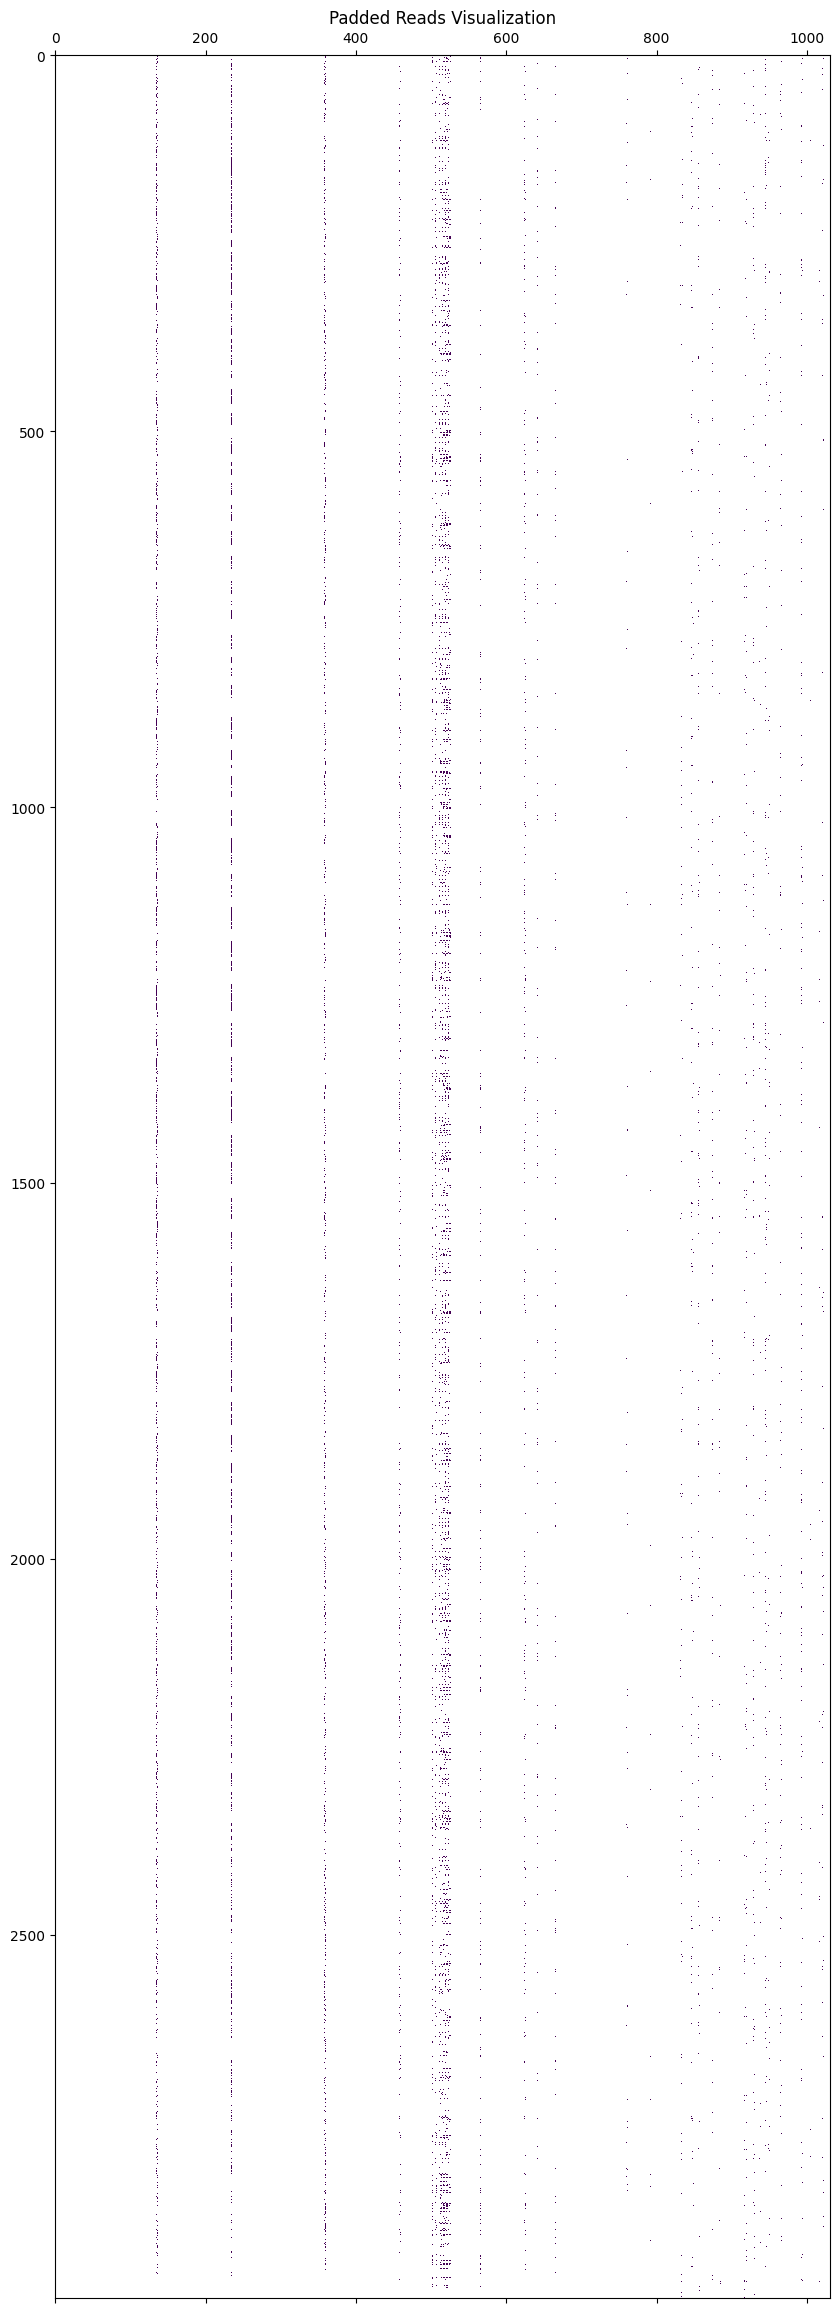

Visualization completed.
Region length: 1031
GACATGGATGAAGCTGGAAACCATCAACCTCAGCAAACTAACATAAGACCAGAAAACCAAACACTGCATGTTCTTACTCATAAGTGGGAGTTGAACAATGAGAATACACAGACACAGGGAGGGGAACATCACACACGGGGGCCTGTTGGAGGGTGGGGGTTAGGGGAGGGATAGCATTAGGAGAAATACCTAATGTAGATGTTGGGTTGATGGGTGCAGCAAACCACCATGGCACGTGTATACCTATGTAACAAACCTGCATGTTCTGCACATGTATTCCAGAACTTAAAGAATATATATTTATATATGTATAAATATATATGAATATATAAATATAAATATATATATAAGCTCCCCACGTGATTCTAATGTGTGGCCAGTCTTGCAAACCTCAGGCTATTTATTCTAAAGGGTTTGTAACAAGCCTTCCTCTTAAAATCCACCCCACCACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATTTCTCTCTACAGTCAGTCTGGAGTAATCCCAAAGTGGTGTCTTTCGTAAATAAGGAGAACCCGGGTGAAGAAAATGACTCCCACCCGAACAAGGCATGAACAATGTTCACTCCCTACTGTGTTATTCAACCTGTTTCCCCAGGTCTCTGTTTTCACATTAGAGAGTGTTCTAGGAGATGACGCCCTTCCTCCTTAGTTATTTCCCCACCCTCGTGCTGGCCTTTGACAGACCTCCCAGTAGAGGGCCCAAGACGCGGGTAGAGCACCGCGTCTCAGCGCCTGAGTCTCAGCCCCCGAACTCCACCGCACCTGCAGGTCCCCTTGGCAGCACTCAAGCGCGGGGATGCTCCGCTTAGACGAACTCACGTGCGGGCA

Forward reads: 1656
Reverse reads: 1328
DataFrame shape: (2984, 1031)
         G    A    C    A    T    G    G    A    T    G  ...     C     G    A  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  59.0  33.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.0   1.0  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.0   1.0  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.0   1.0  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.0   1.0  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.0   1.0  NaN   
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.0   1.0  NaN   

         G    G    A    G    A    T    A  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  N

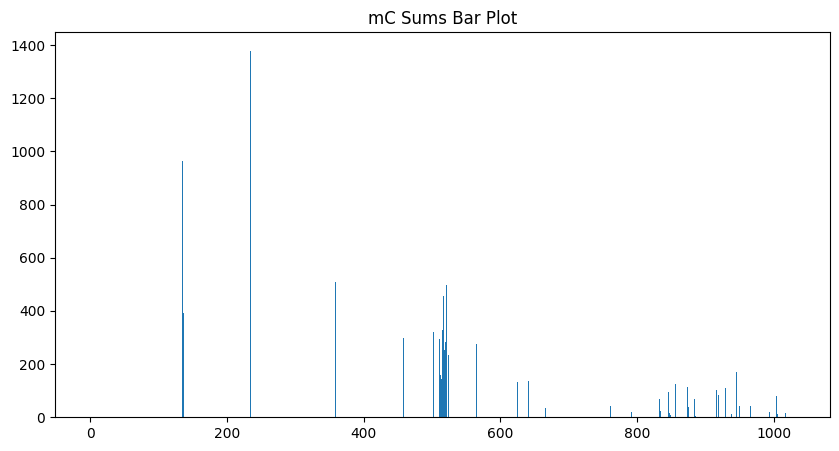

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


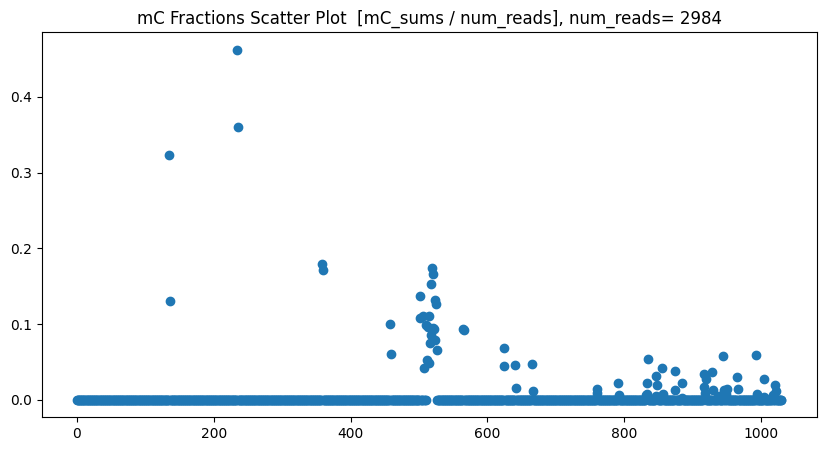

CGs_all_sums  = [1354. 2455. 1046.  480.  730.  458.  452.  431.  555.  711.  803.  773.
  631.  572.  550.  336.  184.  174.   72.   85.   85.  184.  110.   67.
  149.  150.   73.  150.  109.  149.   26.  212.   65.  133.  199.   92.
   25.   92.]


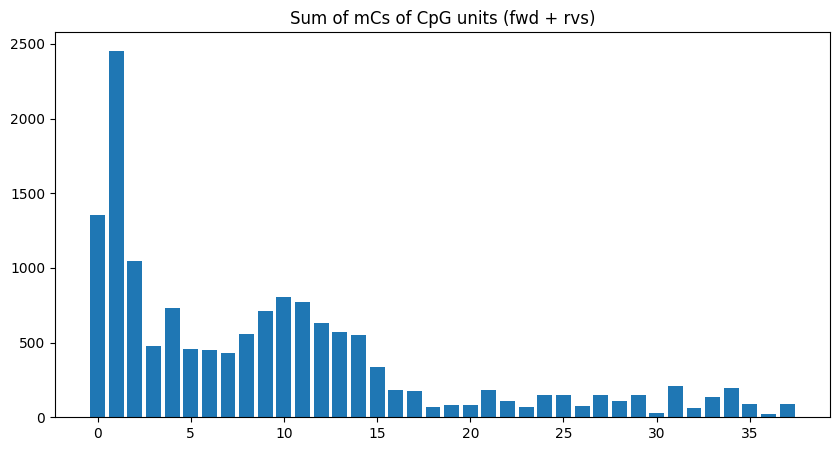

CGs_all_sums / len(CGs_all) = [0.45375335 0.82272118 0.35053619 0.16085791 0.24463807 0.15348525
 0.15147453 0.144437   0.18599196 0.23827078 0.26910188 0.25904826
 0.21146113 0.19168901 0.18431635 0.11260054 0.0616622  0.05831099
 0.02412869 0.02848525 0.02848525 0.0616622  0.03686327 0.02245308
 0.04993298 0.0502681  0.02446381 0.0502681  0.03652815 0.04993298
 0.00871314 0.07104558 0.02178284 0.04457105 0.06668901 0.0308311
 0.00837802 0.0308311 ]


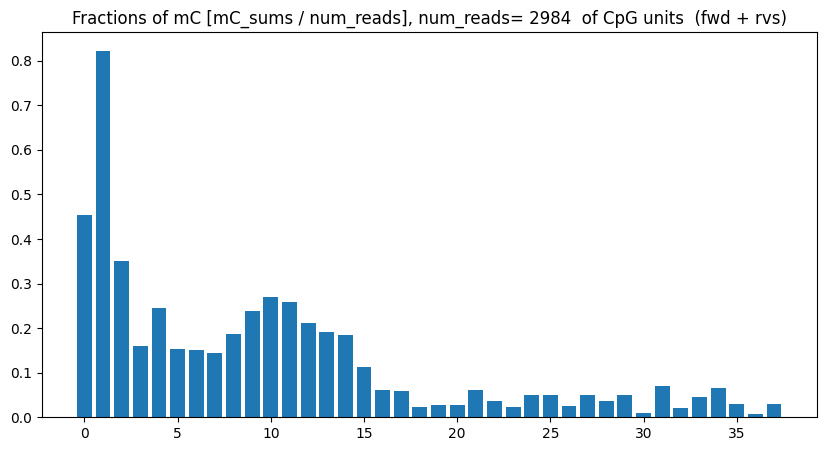

CGs_all_on_fwd_C_sums = [0. 0. 0. ... 0. 0. 0.]


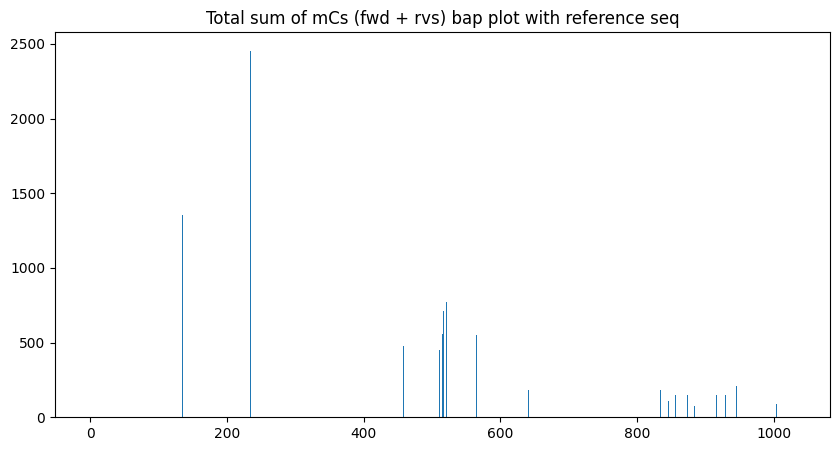

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (1031, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 2984
CGs_all_on_fwd_C_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


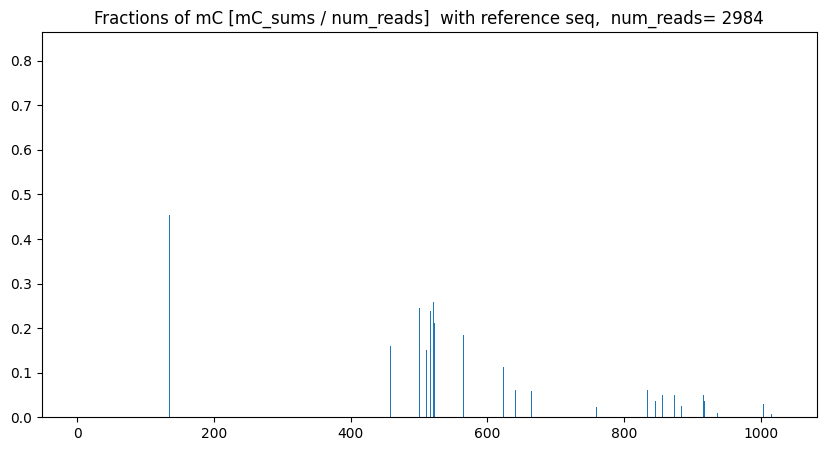

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (1031, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



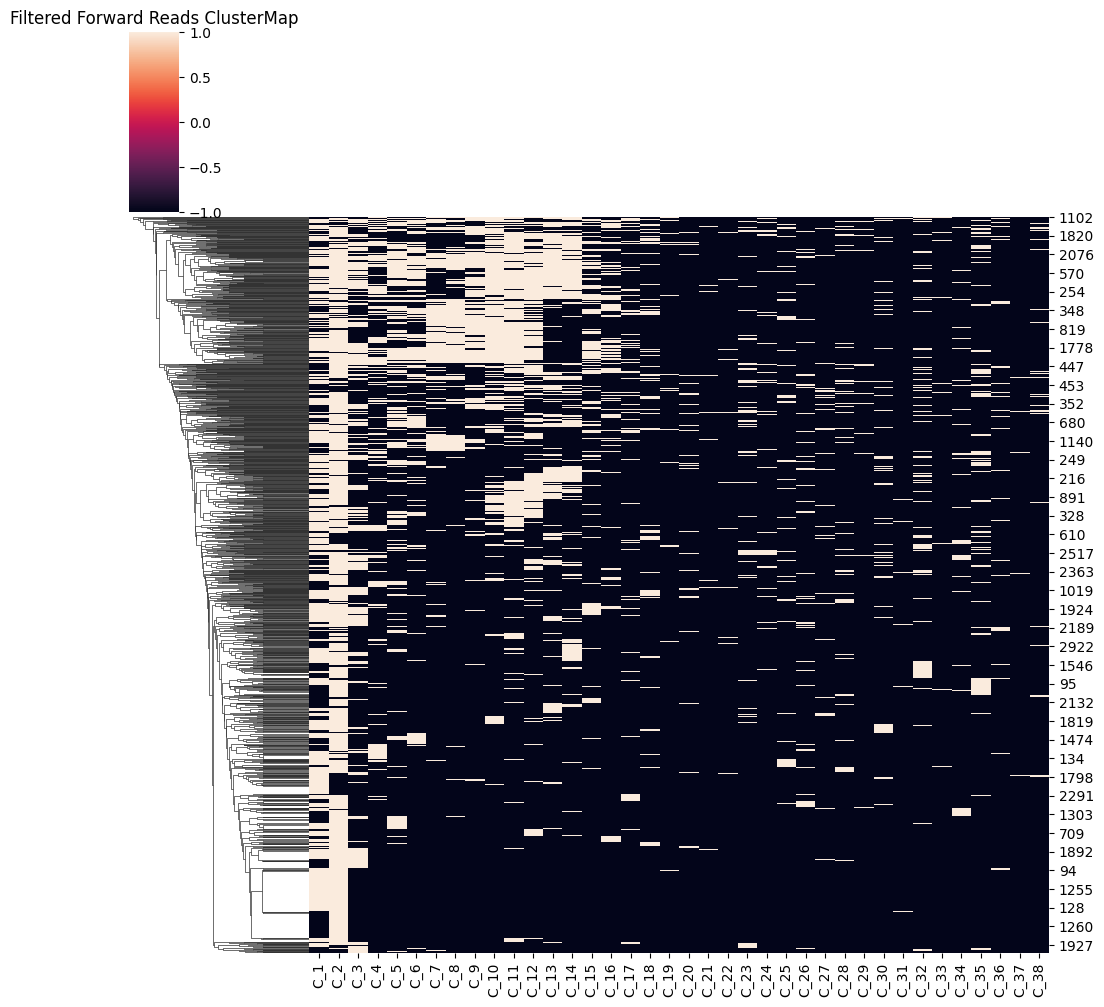

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



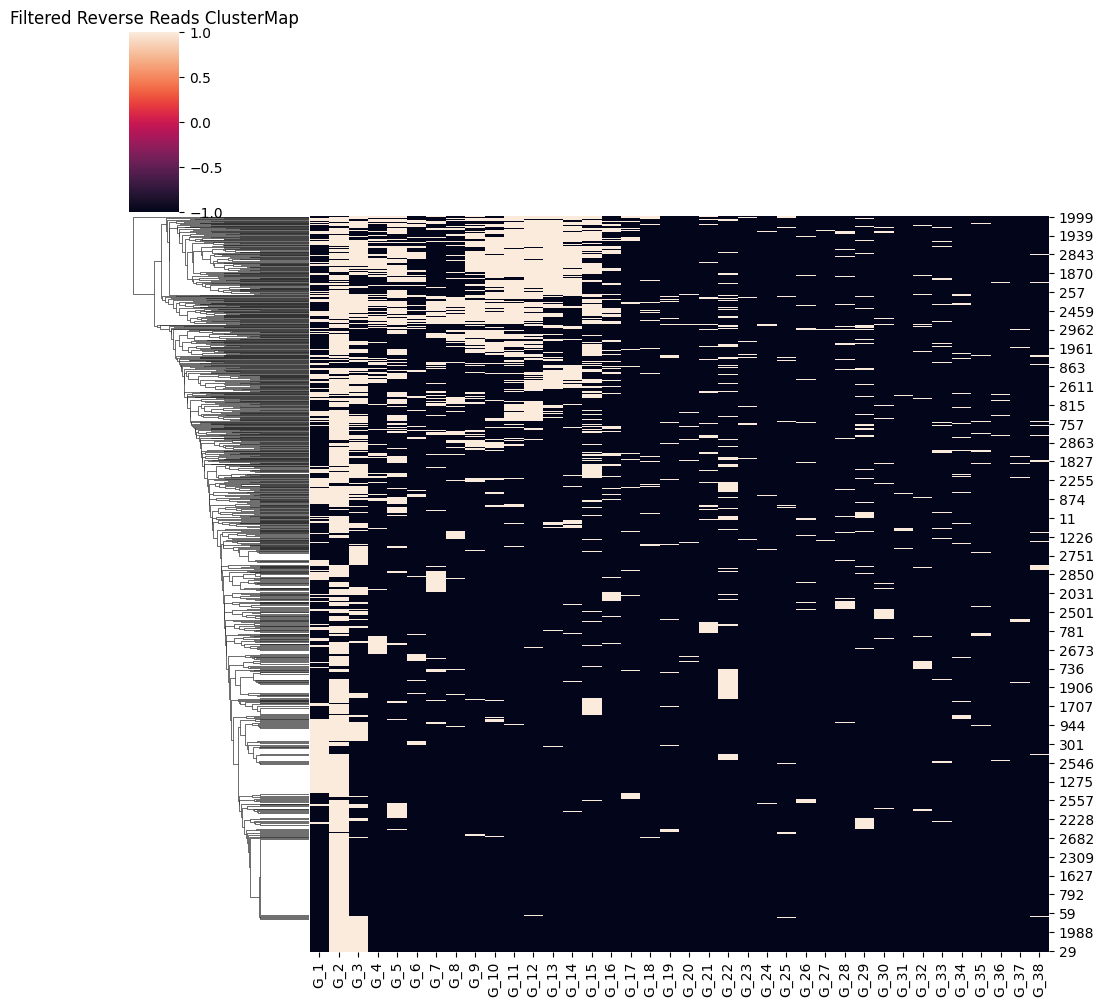

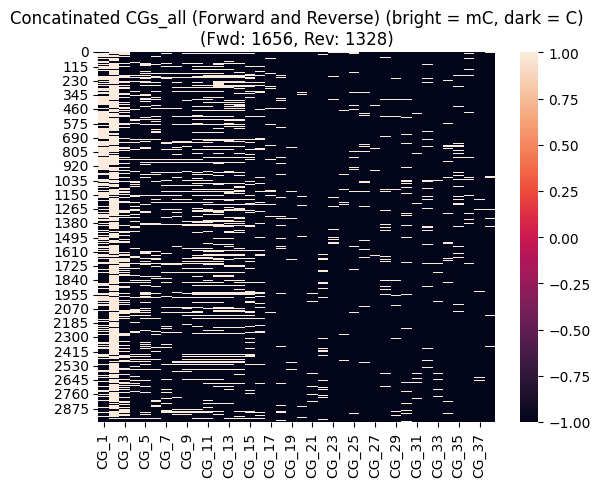

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



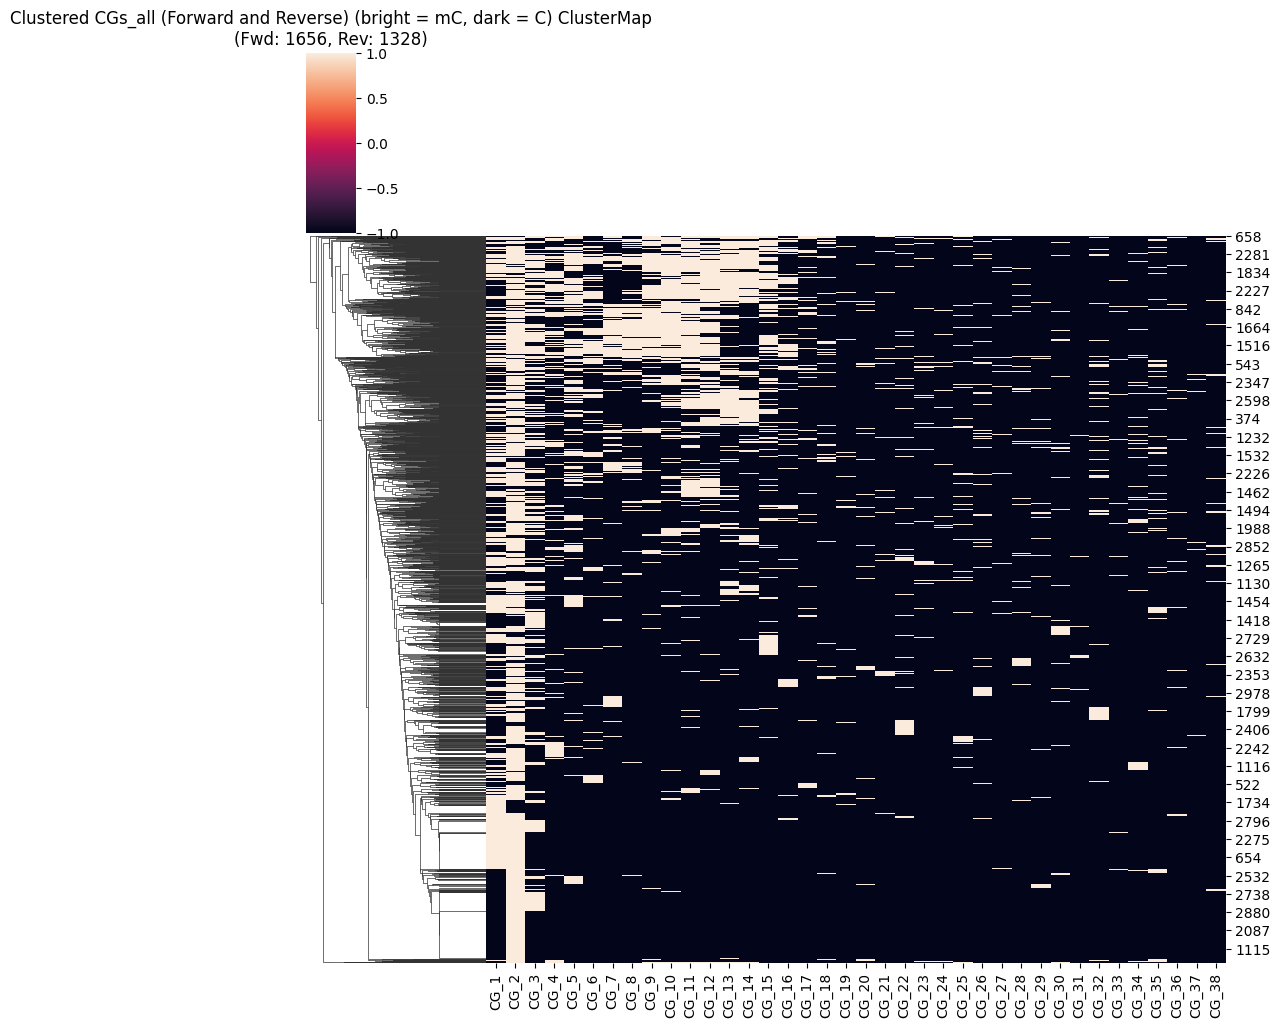

CGs_all saved as CG_38_units_combined_unedited_T_primerES_nCATS_numFWD1656_numRVS1328_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206585662-206586693_2025-02-25.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [6]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited T cells:
From around 3000 reads located near the ROI, 

only ~1700 reads have non-zery mC

(with 70% confidance at least one methylated C  in the mC call) 

Forward reads: 1081 

Reverse reads: 662

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.…

          |    0%

          | Transferring 9150 from reads.CG,0.txt into reads.combined_basemods.h5, new size 9150   0% | 00:00<…

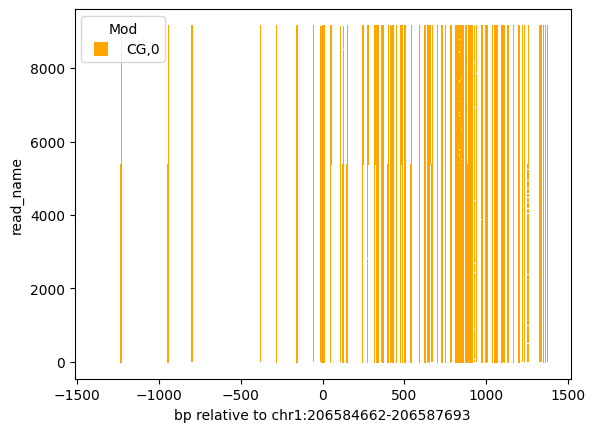

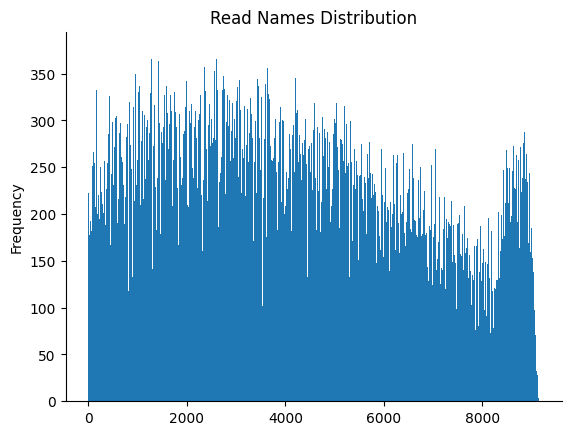

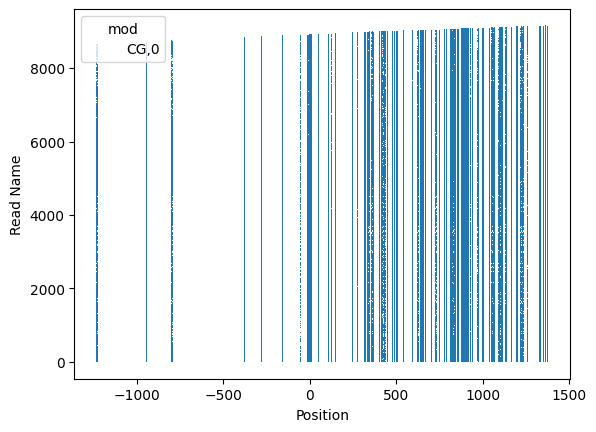

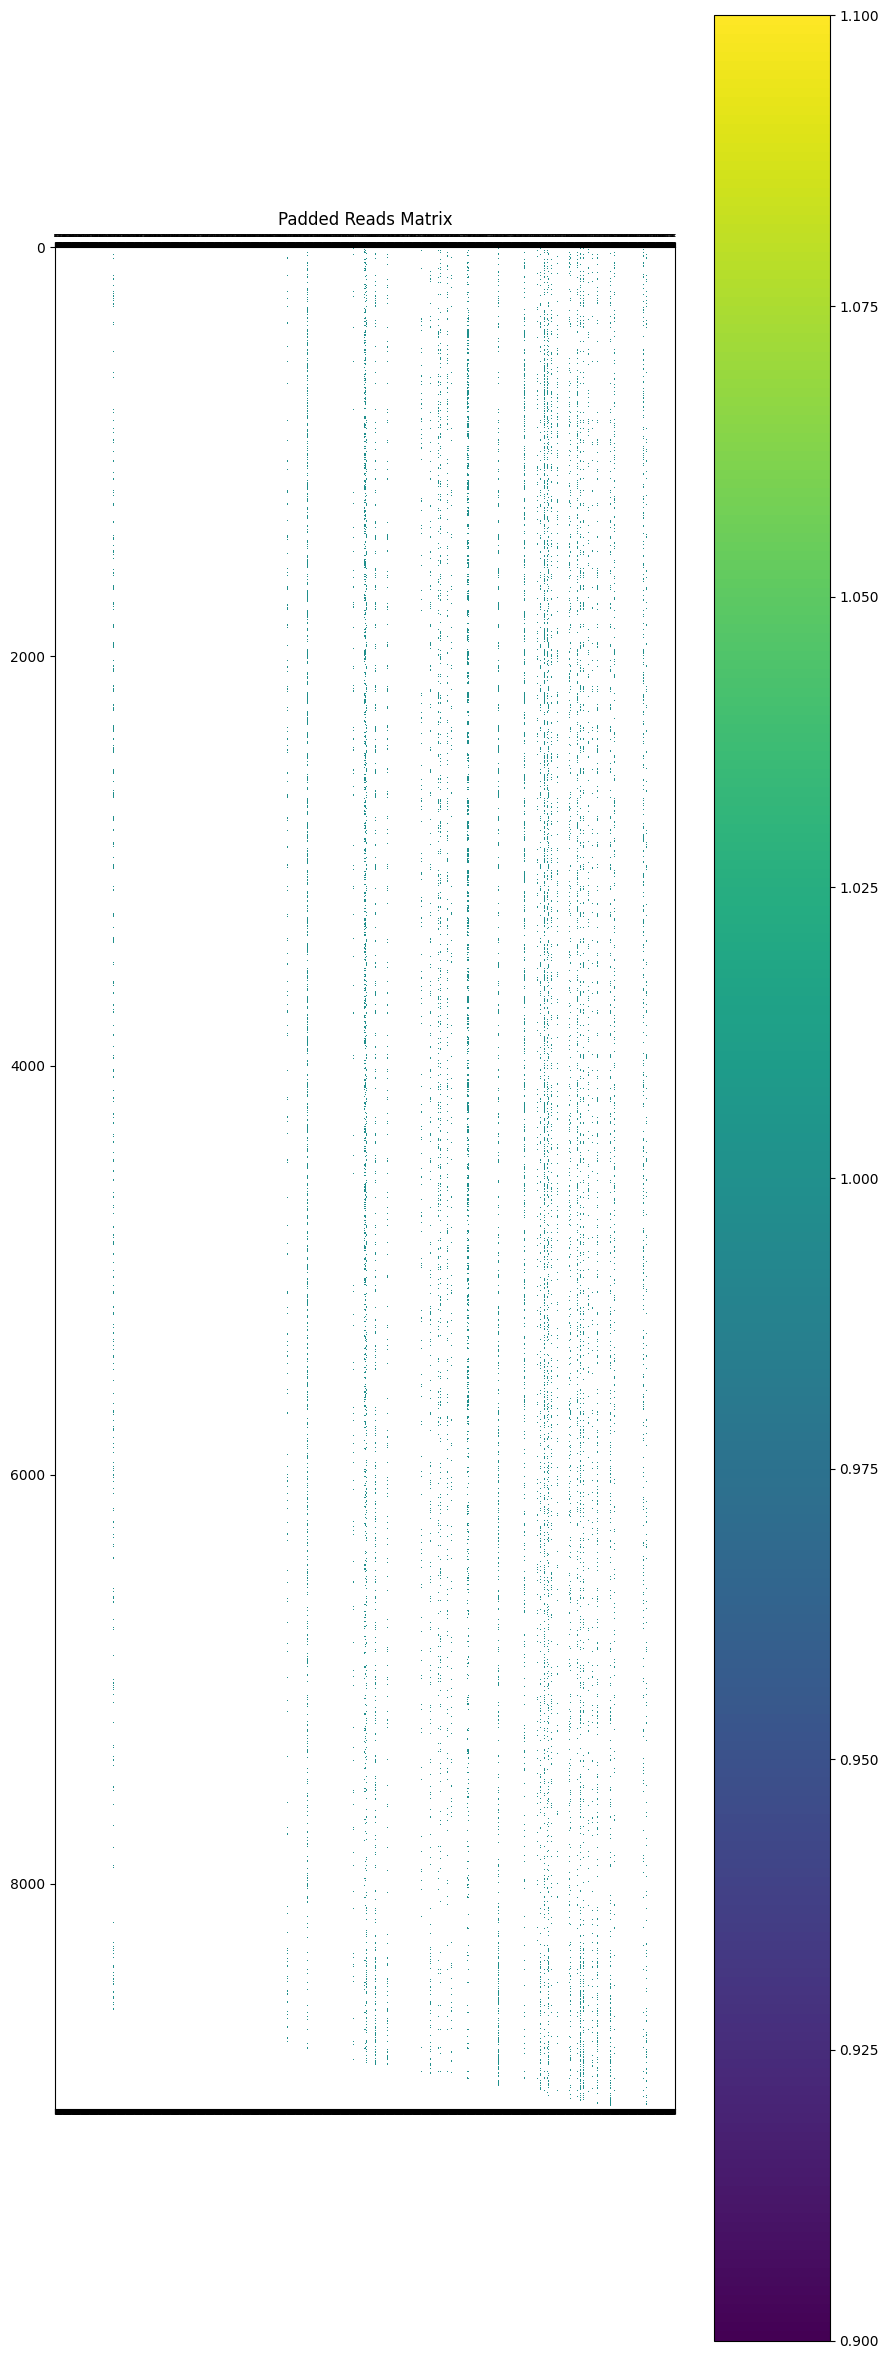

Padded reads saved to padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy


In [5]:

# def main():
#     """Main function to execute all tasks."""
system_info()

experiment_name = "silenced_T_primerES_nCATS"
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

In [7]:
save_padded_reads_name_np

'padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206585862-206586493_2025-02-25.npy'

Padded reads loaded successfully.


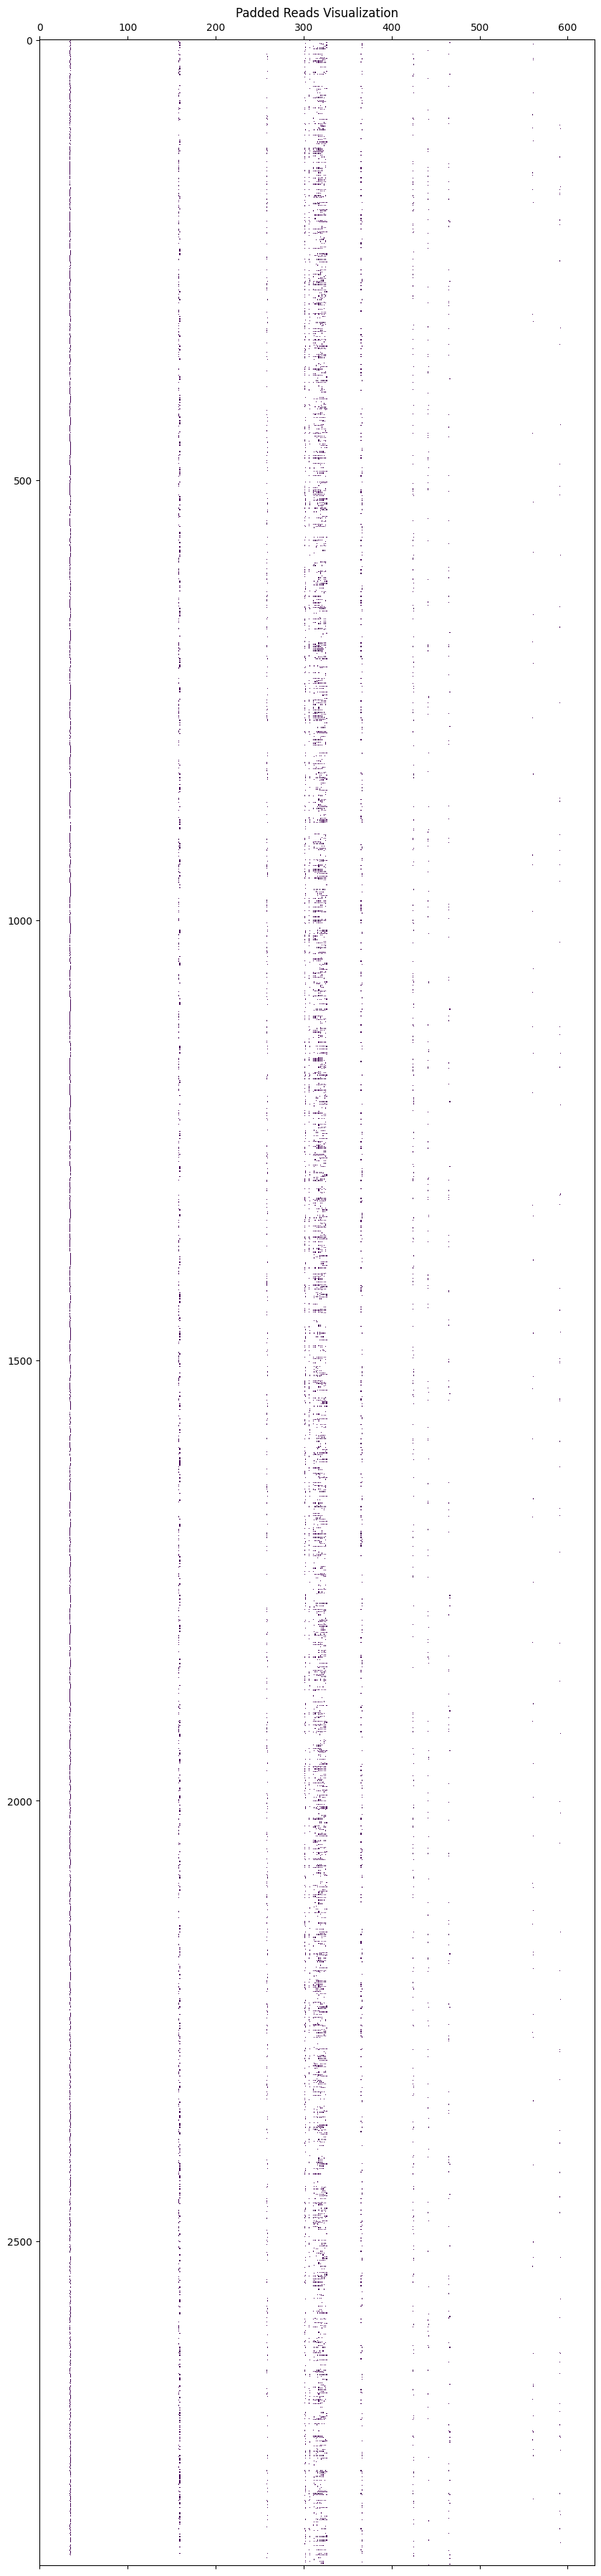

Visualization completed.
Region length: 631
GTTGGGTTGATGGGTGCAGCAAACCACCATGGCACGTGTATACCTATGTAACAAACCTGCATGTTCTGCACATGTATTCCAGAACTTAAAGAATATATATTTATATATGTATAAATATATATGAATATATAAATATAAATATATATATAAGCTCCCCACGTGATTCTAATGTGTGGCCAGTCTTGCAAACCTCAGGCTATTTATTCTAAAGGGTTTGTAACAAGCCTTCCTCTTAAAATCCACCCCACCACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATTTCTCTCTACAGTCAGTCTGGAGTAATCCCAAAGTGGTGTCTTTCGTAAATAAGGAGAACCCGGGTGAAGAAAATGACTCCCACCCGAACAAGGCATGAACAATGTTCACTCCCTACTGTGTTATTCAACCTGTTTCCCCAGGTCTCTGTTTTCACATTAGAGAGTGTTCTAGGAGATGACGCCCTTCCTCCTTAGTTATTTCCCCACCCTCGTGCTGGCCTTTGACAGACCTCCCAGTAGAGGGCCCAAG
631
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [34, 158, 258, 301, 306, 311, 313, 315, 317, 319, 321, 323, 325, 365, 424, 441, 465, 560, 591]
Forward reads: 1603
Reverse reads: 1266
DataFrame shape: (2869, 631)
         G    T    T    G    G    G    T    T    G    A  ...    A    G    G  

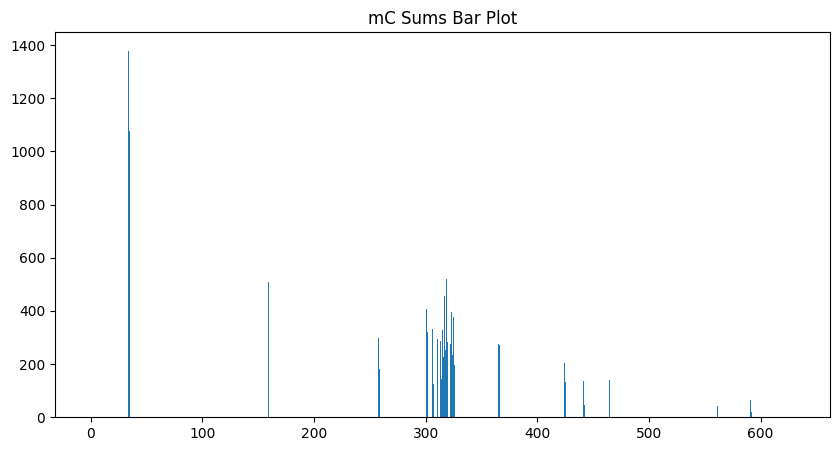

(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.48065528 0.37504357
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        

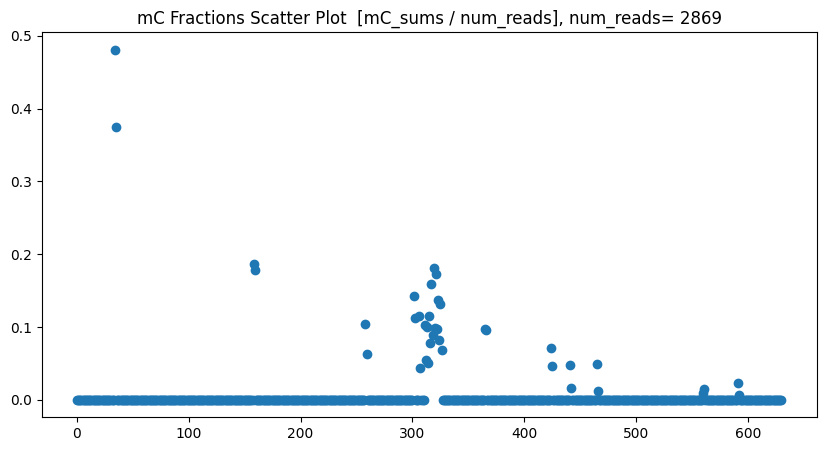

CGs_all_sums  = [2455. 1046.  480.  730.  458.  452.  431.  555.  711.  803.  773.  631.
  572.  550.  336.  184.  174.   72.   85.]


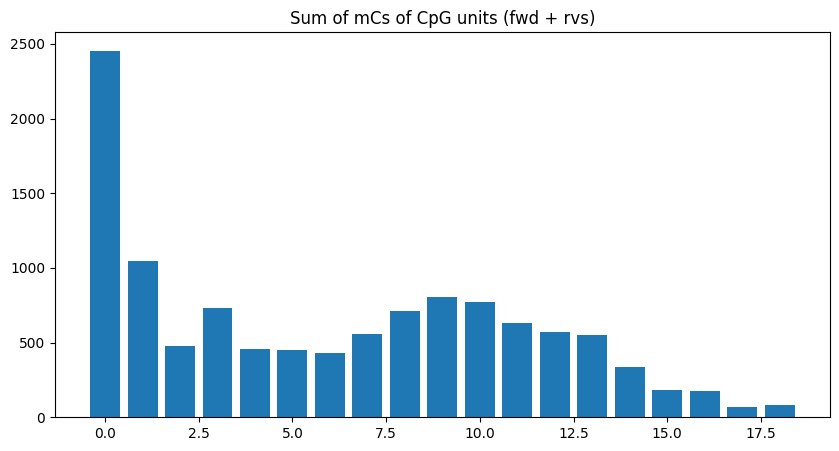

CGs_all_sums / len(CGs_all) = [0.85569885 0.36458696 0.16730568 0.25444406 0.1596375  0.15754618
 0.15022656 0.19344719 0.24782154 0.27988846 0.26943186 0.21993726
 0.1993726  0.19170443 0.11711398 0.06413384 0.06064831 0.02509585
 0.02962705]


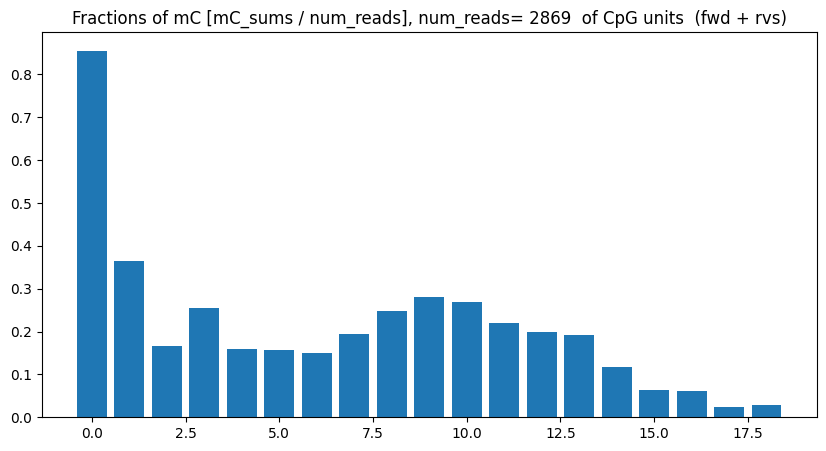

CGs_all_on_fwd_C_sums = [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 2455.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. 1046.    0.   

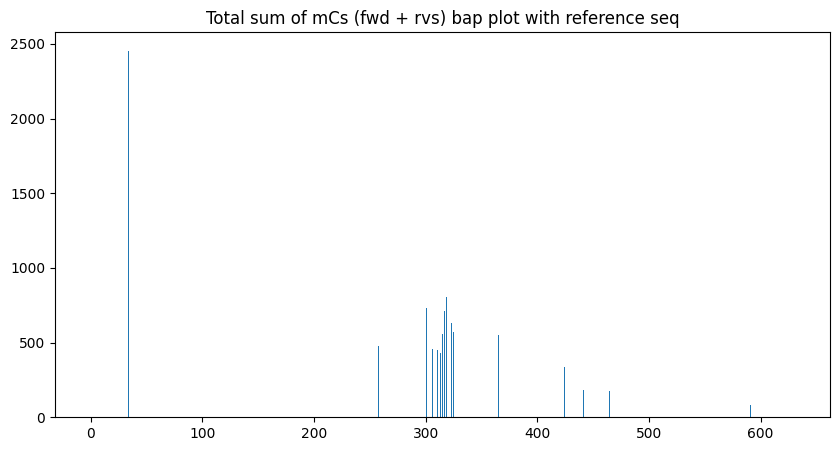

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (631, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 2869
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.85569885 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

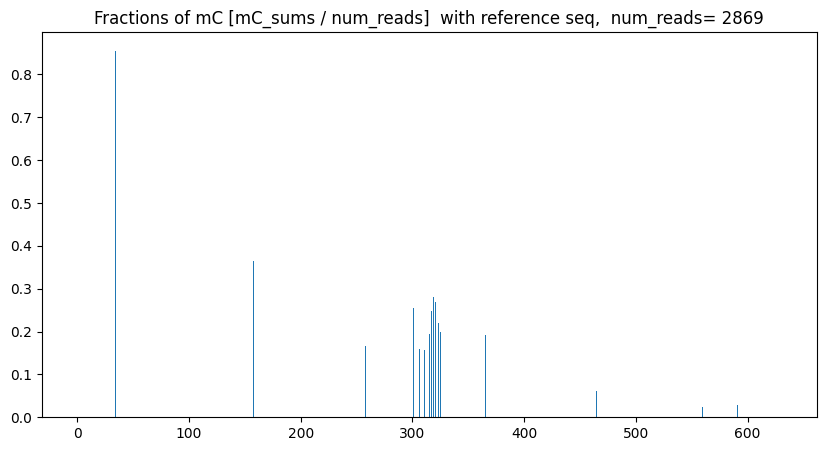

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (631, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



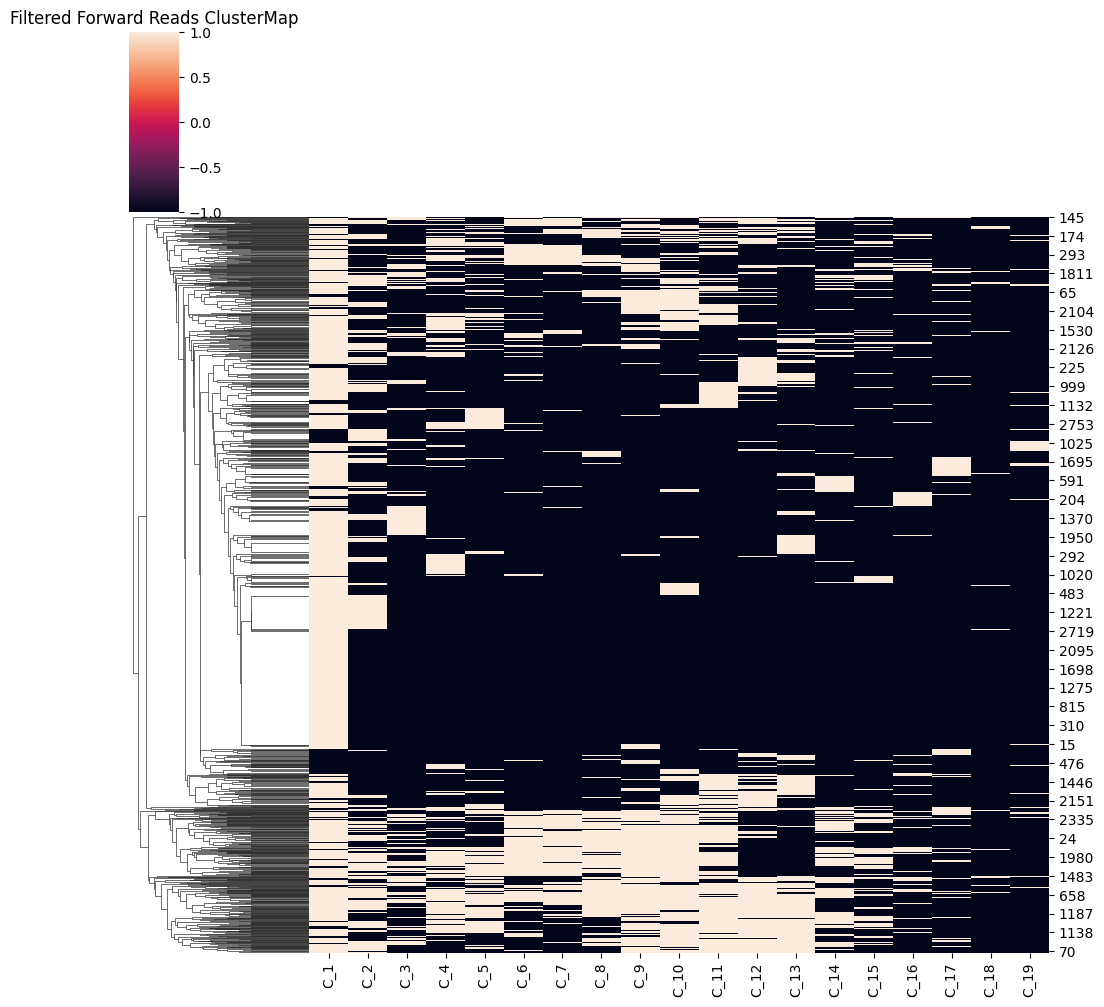

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



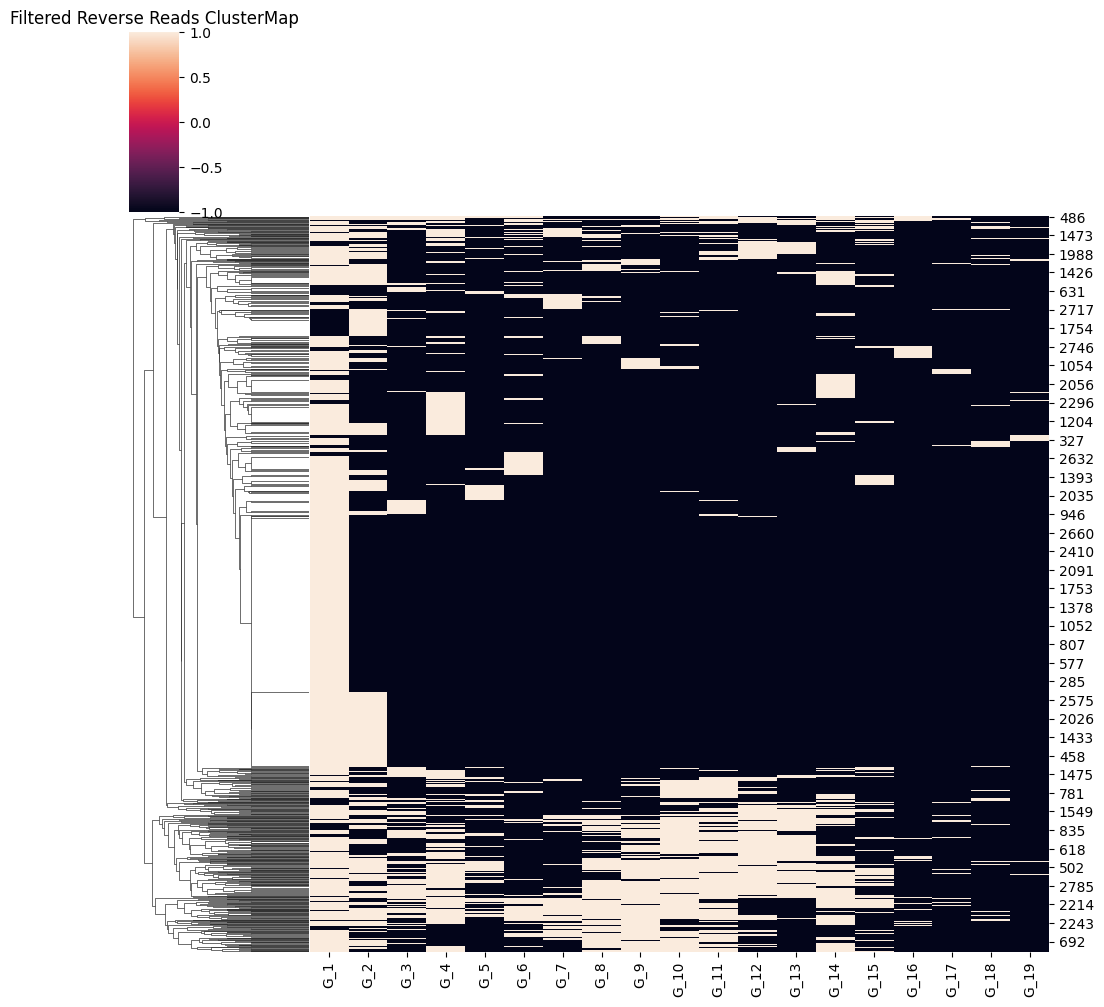

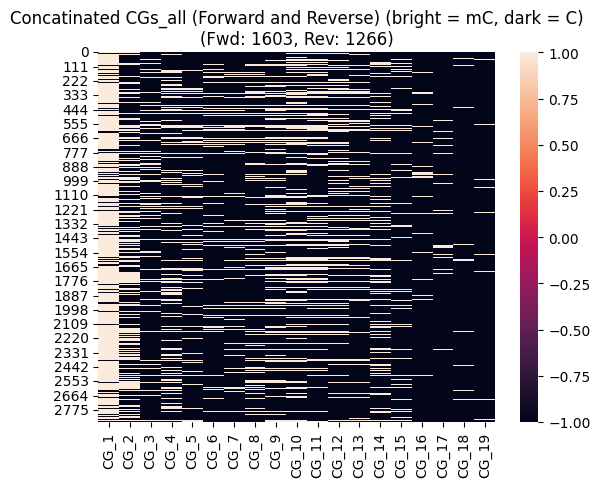

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



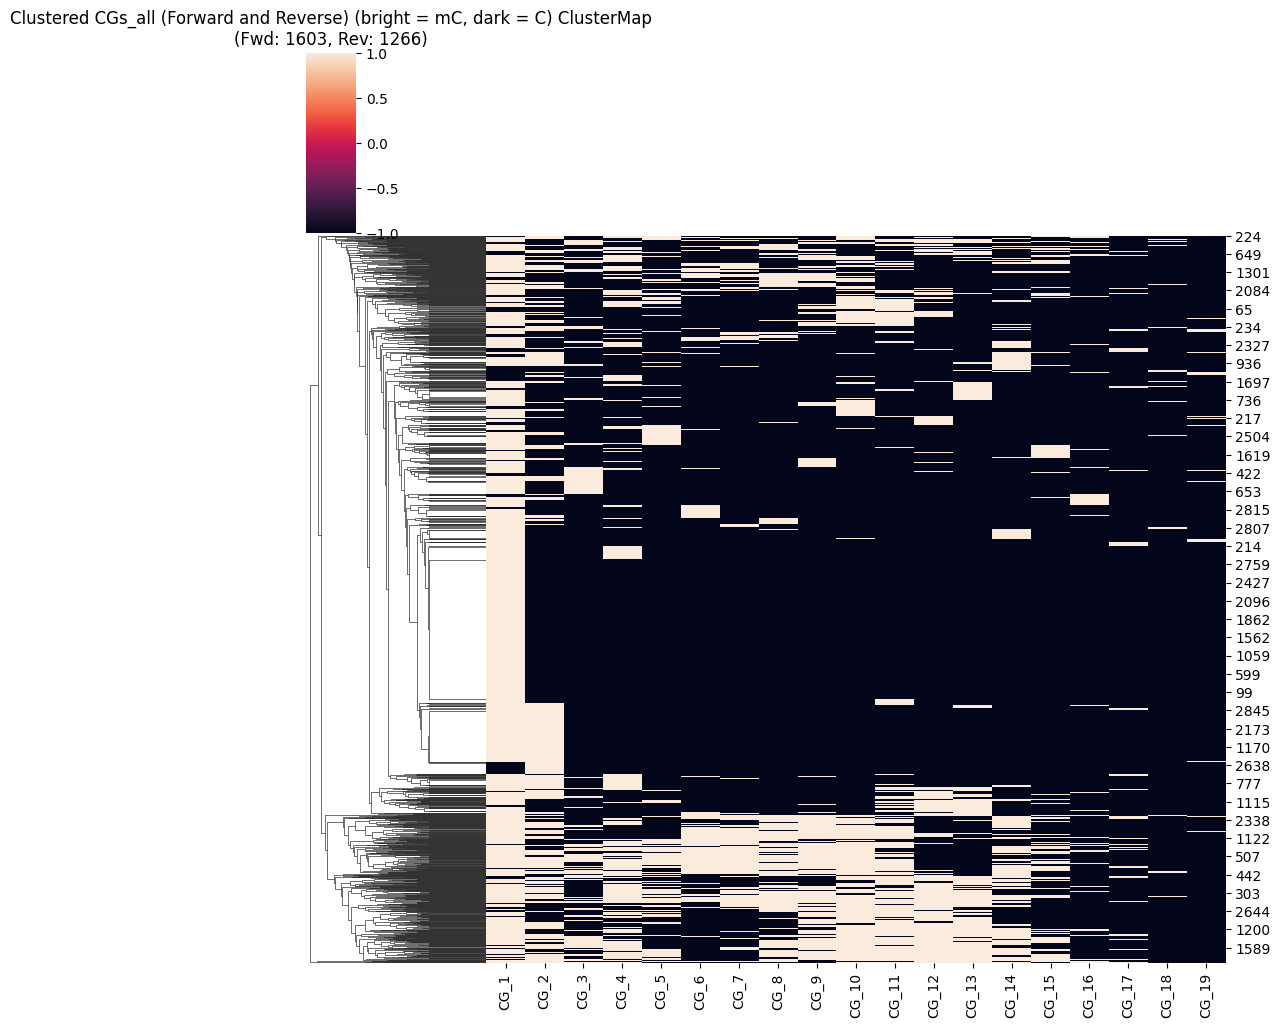

CGs_all saved as CG_19_units_combined_unedited_T_primerES_nCATS_numFWD1603_numRVS1266_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206585862-206586493_2025-02-25.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [8]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silenced CRISPROff primary T cells from ES:
From around 7644 reads located near the ROI, 

 ~7097 reads have non-zery mC 
 
 (with 70% confidance in at least one methylated C the mC calls ) 

Forward reads: 4132

Reverse reads: 2965


# Change the mC threshold to 0.9 - only keep very confident mC values


## T unedited cells

System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 3031
TAATGCTACCTTGCCTTTCACACCAATTCTGTGAGCCCAAGCAGGAATGAAGATTACCTATCTCTAATGGCAGGACAGAAGGGAGTGGTGGTTAAGGTTACTGGAGGTTATTGGGGGAATAAATGAAGACCTCATGCCACTTCTAAACACTGCCAGGACCTAACATACCTTGTGTTTTTATATCCAATATGGGAGTAAAGGTTAGATATTTTAACATCAAATATGAGGATGACACTAGATGGTTTTAAAAGCCCCCCACCATAACTTCTAAACTCCACAATGTTCGAATATTGTTAGGTTTCAGTGAAATCCTACAGTAGTCCCTTGCTTGGAATCACTGTAGGATTGGCTCCAGCAATGGGCAACACAAGGTTTGGTTCTATACAGTAGGTATGGGTCAAAGAAAATGCTATGATTGAAAAATTGCTGTTTTCCTCCTCAAAAAGCTCATACCAACCAGGAAAGAGCTATCAGAAAACCTTCAGGAAAGAATATAATGATAGGATATAACAAATACCCCCACAGCTGGTCCATAGACCAAAGTATAATTCCAAGTAGGGAATTTCACTTAACGAGGTAAGGCATTTAAGGGAAAAGGAATCTAGGCTAGGACTCTGCTAGCCAGACCCAGATAAATTATTACAGGGAAGCATGTTCTTGAGGCTATTCTCTATGAAGAAGGGCAACCCACCTTGCCATCTATATCCTTTCTGTTTTCGACAGGGGTGGTCCTAAGCTGGATAGATCTTTACTCT

          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 3228 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3228   0% | 00:00<…

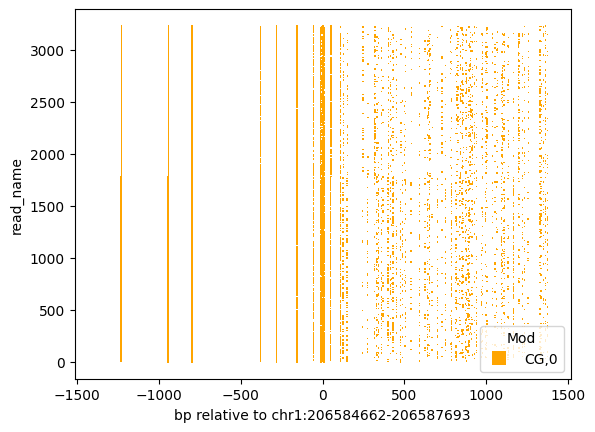

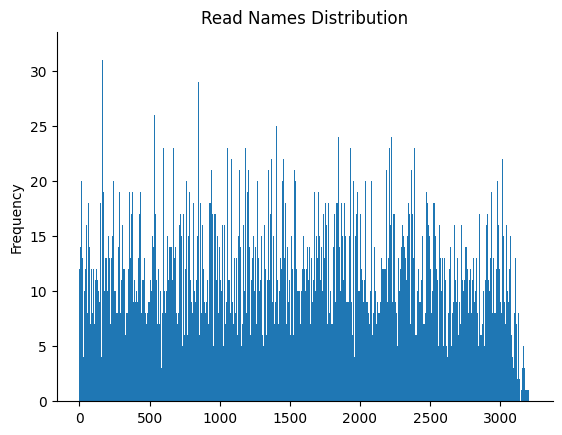

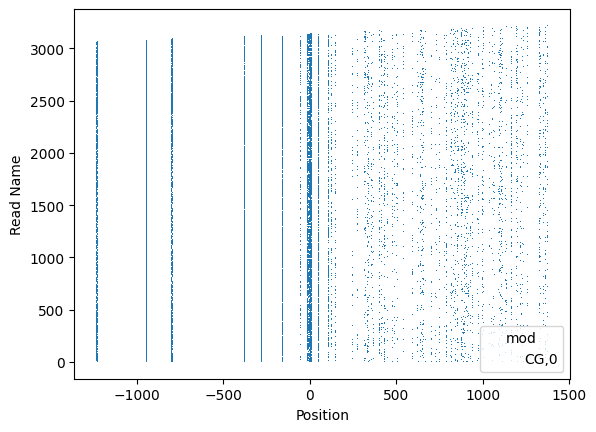

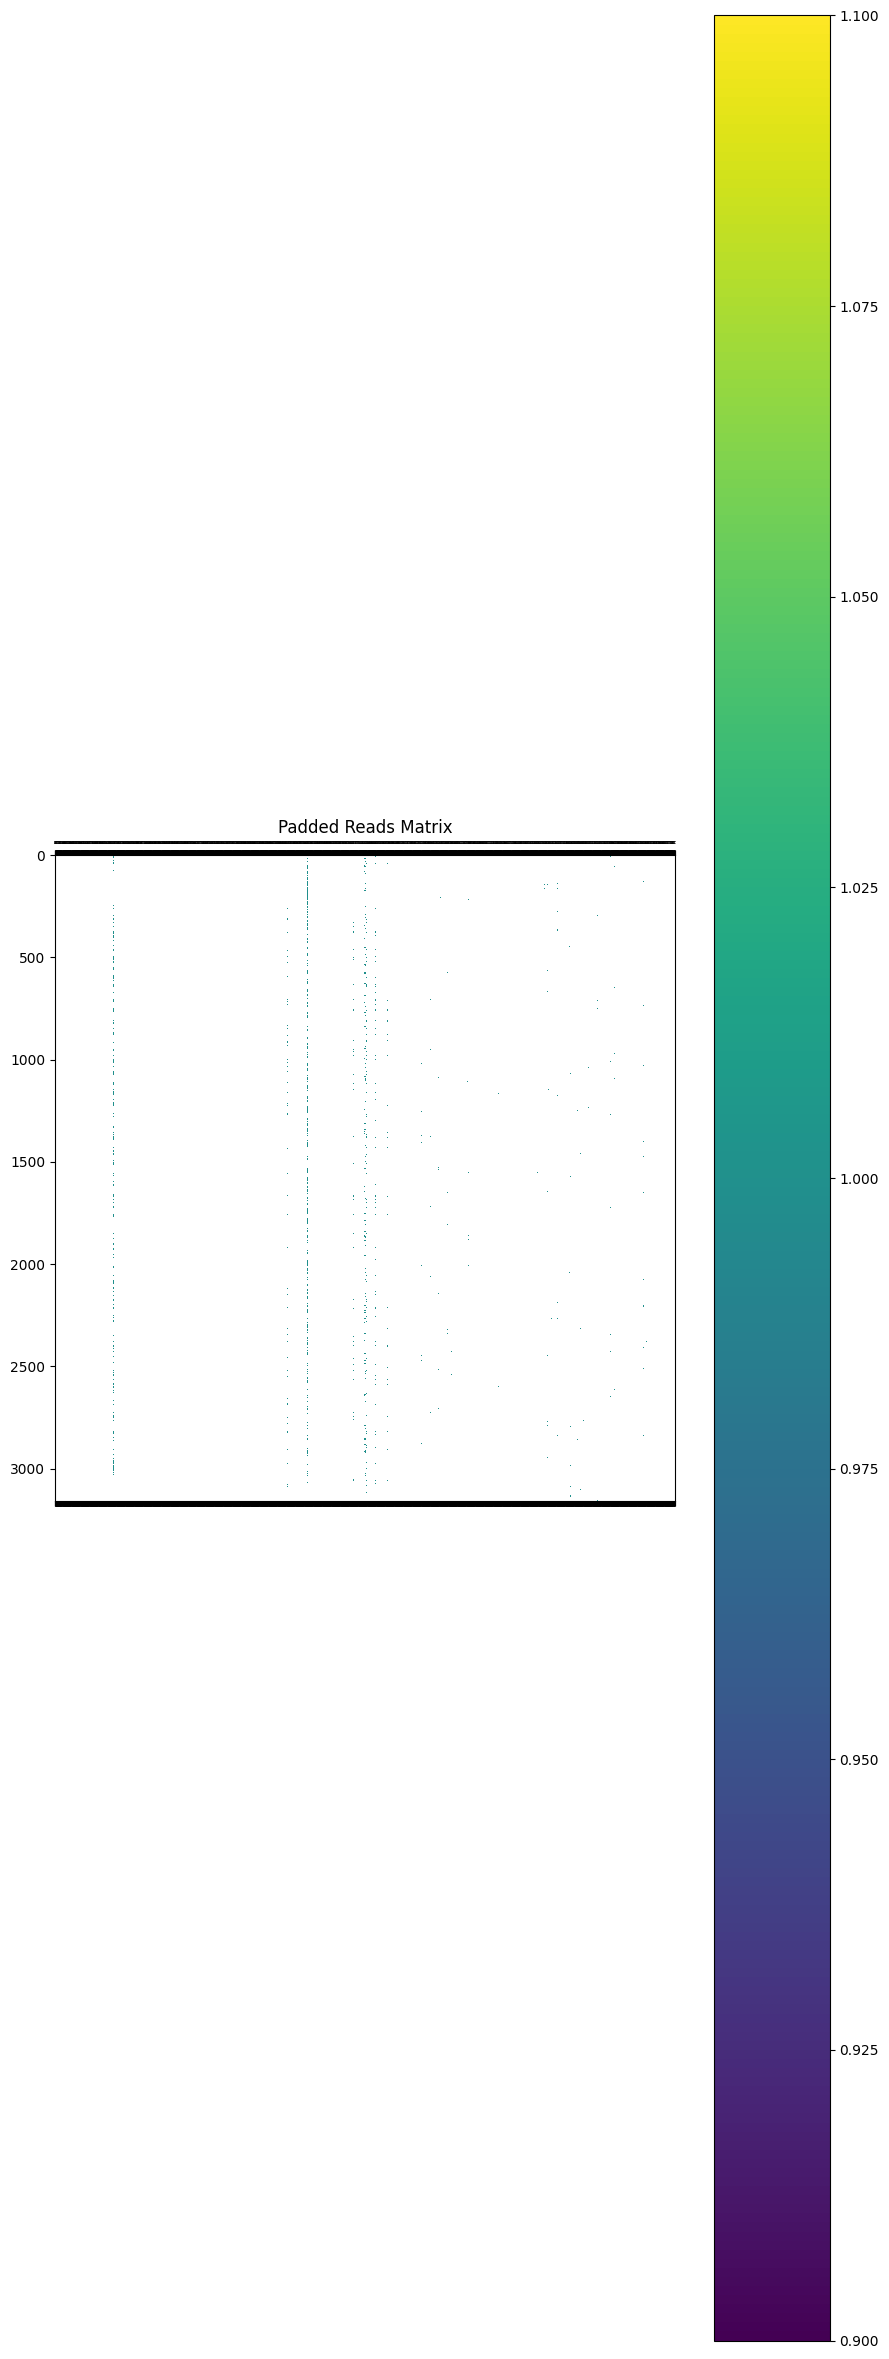

Padded reads saved to padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy


In [8]:
system_info()

experiment_name = "unedited_T_primerES_nCATS"
threshold_mC =  0.9  # 0.7 # #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

Padded reads loaded successfully.


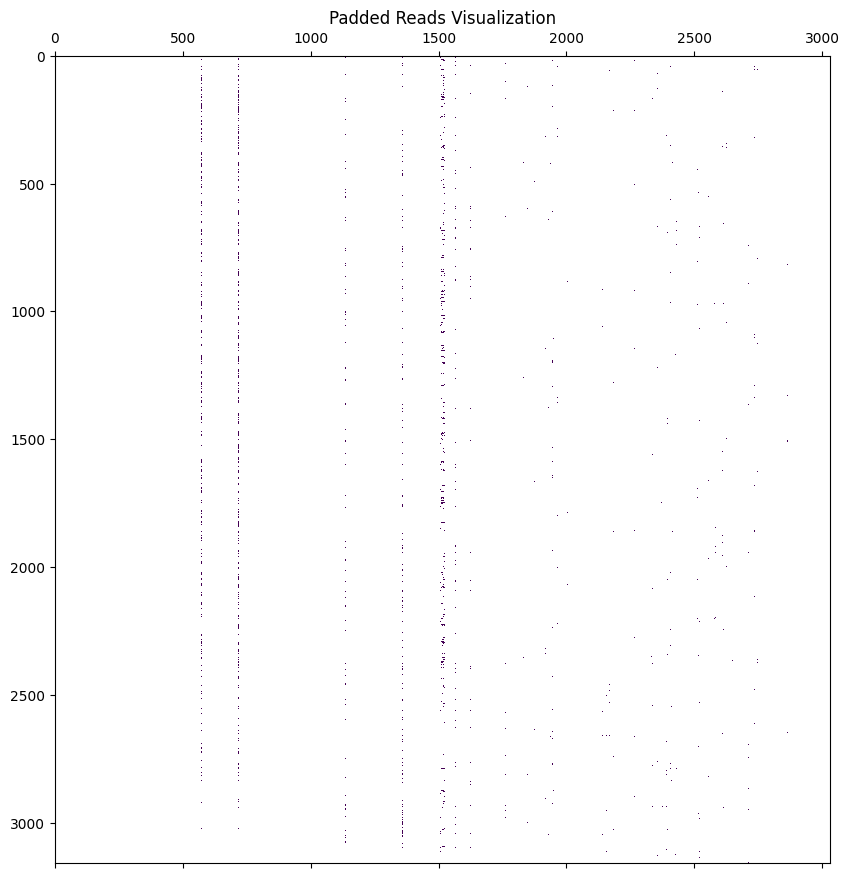

Visualization completed.
Region length: 3031
TAATGCTACCTTGCCTTTCACACCAATTCTGTGAGCCCAAGCAGGAATGAAGATTACCTATCTCTAATGGCAGGACAGAAGGGAGTGGTGGTTAAGGTTACTGGAGGTTATTGGGGGAATAAATGAAGACCTCATGCCACTTCTAAACACTGCCAGGACCTAACATACCTTGTGTTTTTATATCCAATATGGGAGTAAAGGTTAGATATTTTAACATCAAATATGAGGATGACACTAGATGGTTTTAAAAGCCCCCCACCATAACTTCTAAACTCCACAATGTTCGAATATTGTTAGGTTTCAGTGAAATCCTACAGTAGTCCCTTGCTTGGAATCACTGTAGGATTGGCTCCAGCAATGGGCAACACAAGGTTTGGTTCTATACAGTAGGTATGGGTCAAAGAAAATGCTATGATTGAAAAATTGCTGTTTTCCTCCTCAAAAAGCTCATACCAACCAGGAAAGAGCTATCAGAAAACCTTCAGGAAAGAATATAATGATAGGATATAACAAATACCCCCACAGCTGGTCCATAGACCAAAGTATAATTCCAAGTAGGGAATTTCACTTAACGAGGTAAGGCATTTAAGGGAAAAGGAATCTAGGCTAGGACTCTGCTAGCCAGACCCAGATAAATTATTACAGGGAAGCATGTTCTTGAGGCTATTCTCTATGAAGAAGGGCAACCCACCTTGCCATCTATATCCTTTCTGTTTTCGACAGGGGTGGTCCTAAGCTGGATAGATCTTTACTCTGACCAGTACCATATAGGTCTGTGGTTCTCAAACCTGGCTGCACAGTGTGGCACTTTAAGTAATCCTGATACCCAGTCCCATCCCCAAAGATGCTGATTTAATTTGTCTAAGGTGCAGTTTGGGCCTCTGGATTGGAACCAACCCATATACCCATCAATGATAGACTGGATAAAGAAAATGTGGCACATATACACCATAGA

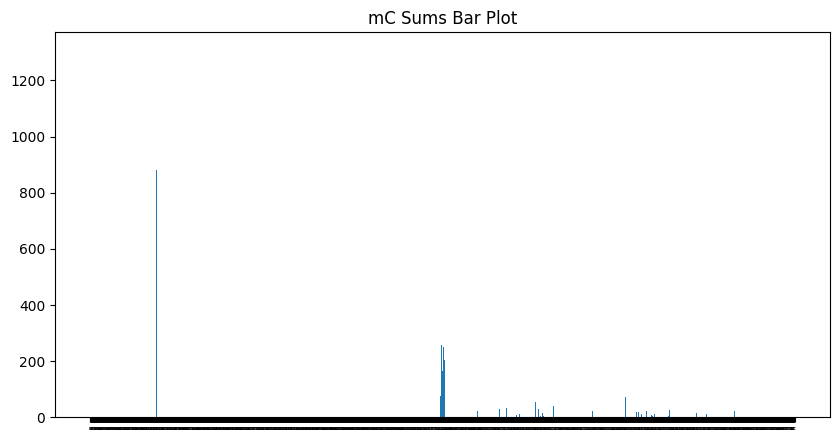

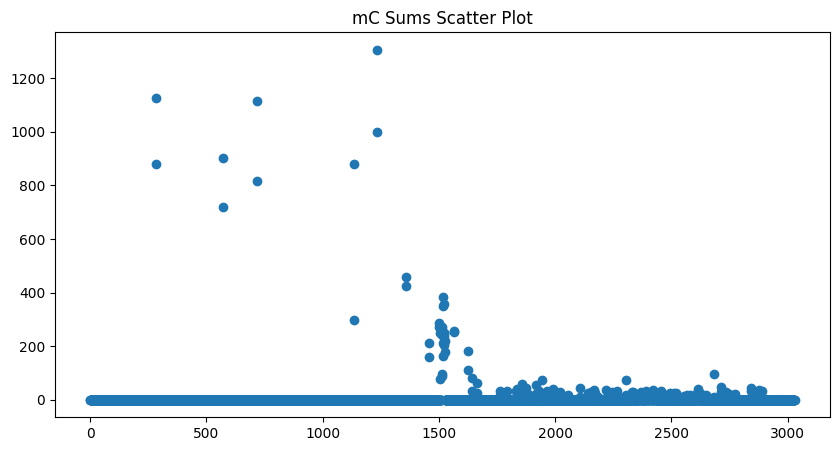

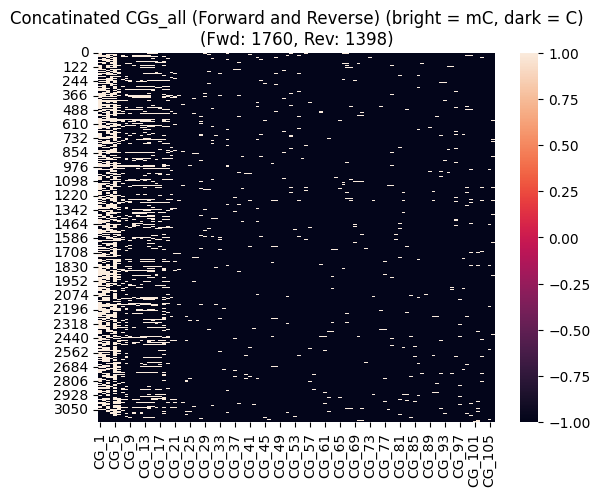

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


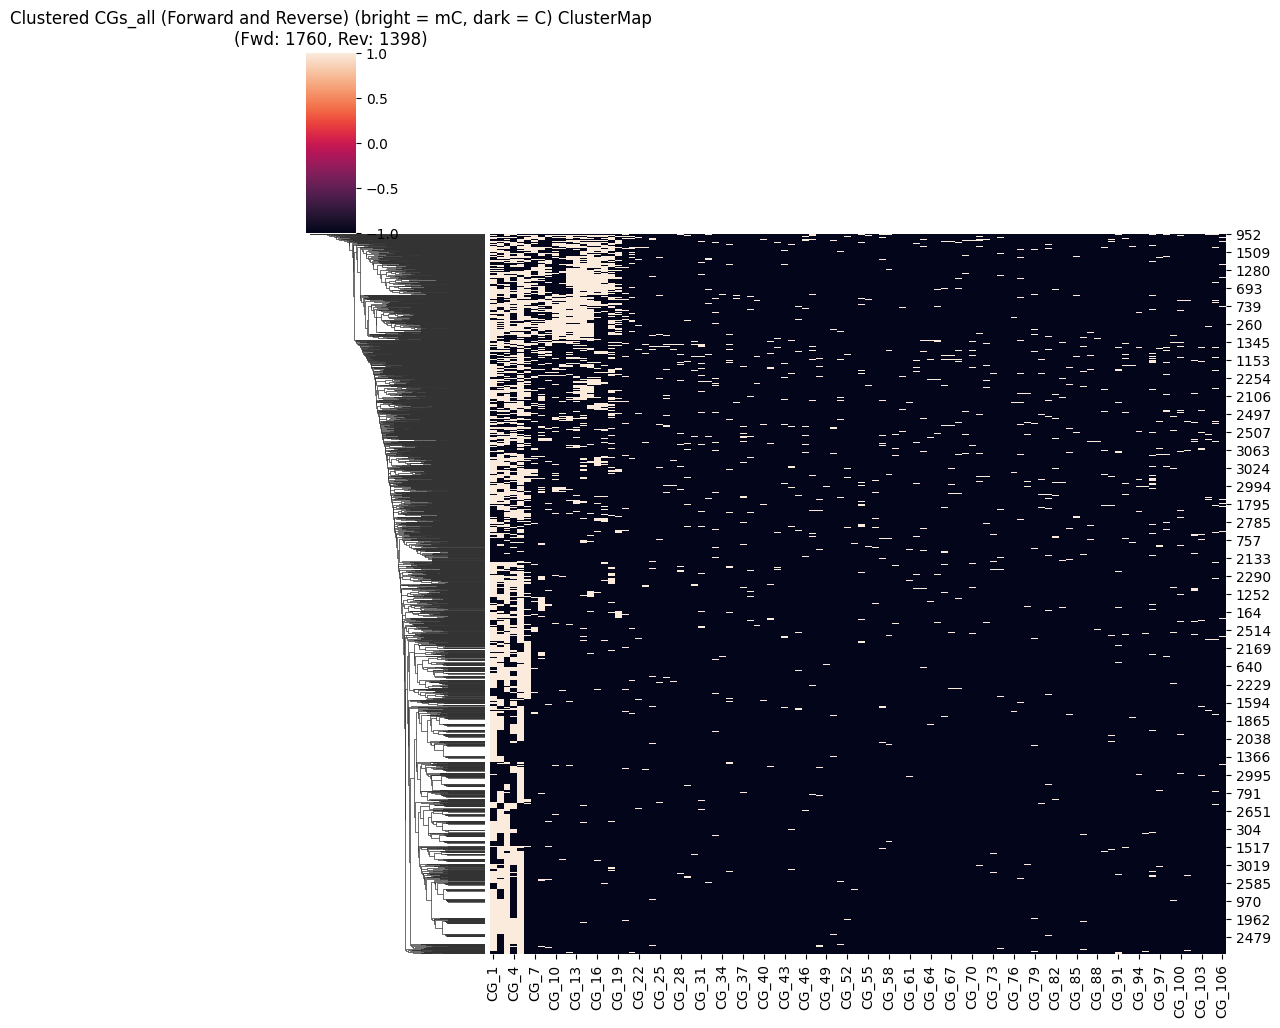

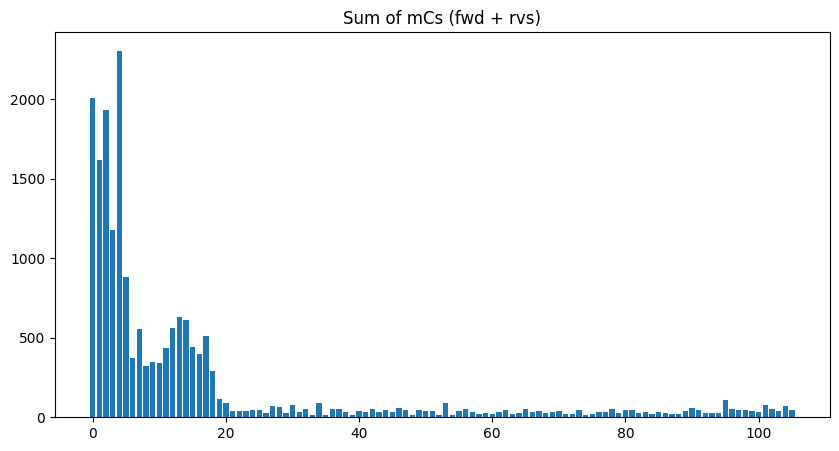

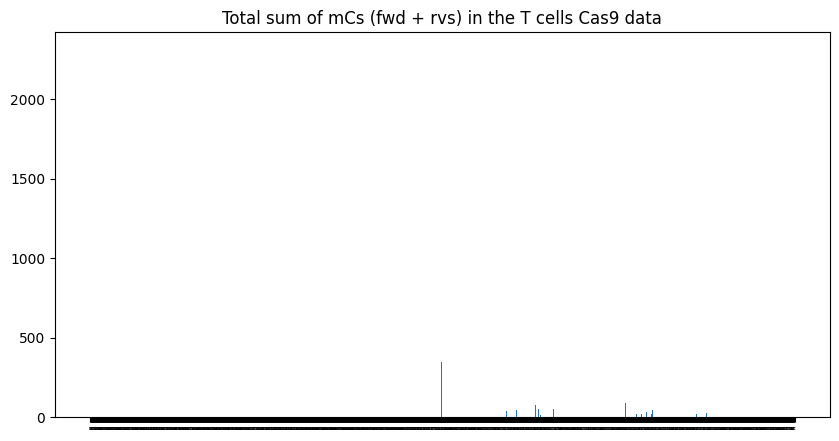

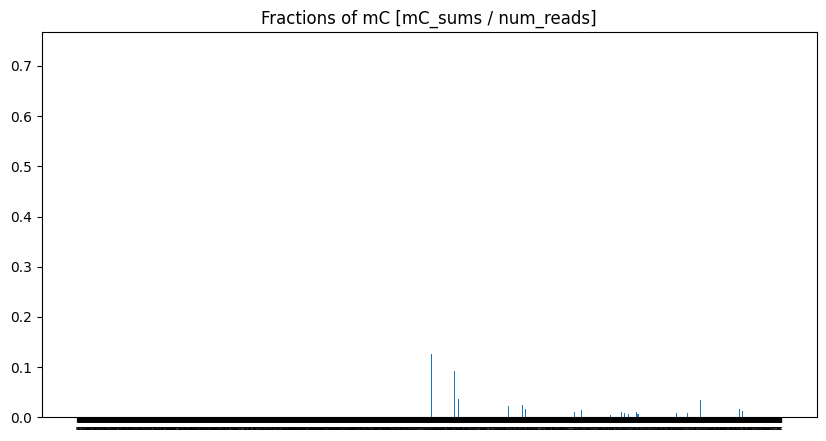

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


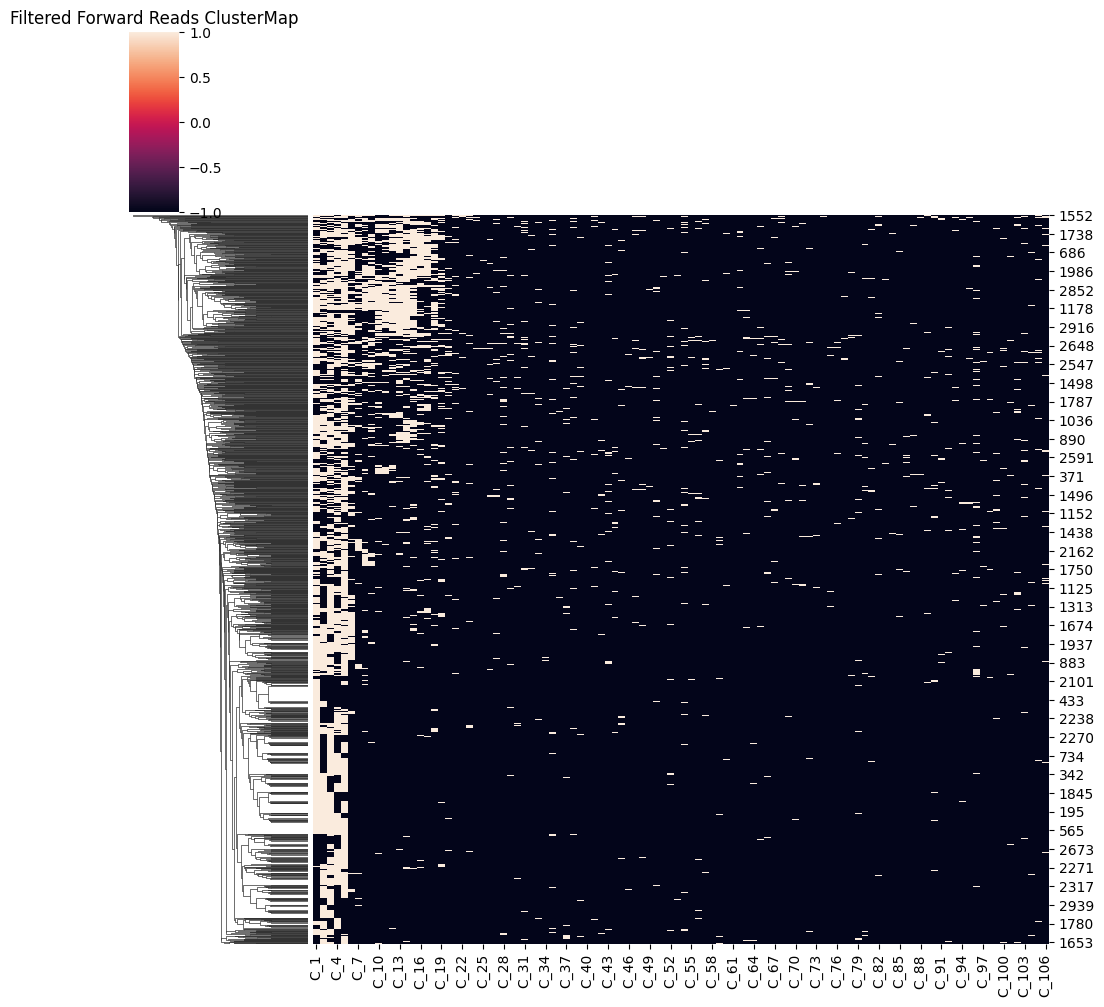

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


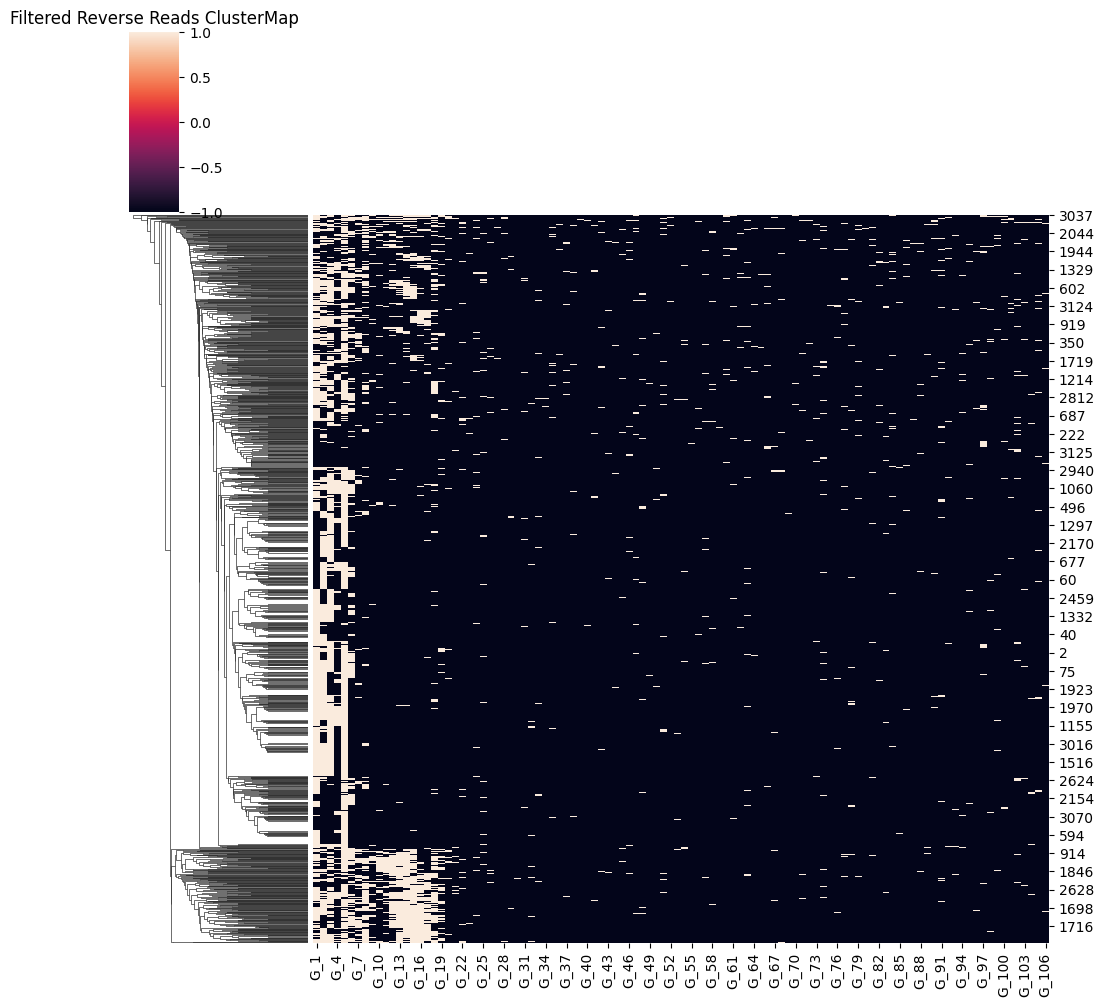

CGs_all saved as CG_106_units_combined_unedited_T_primerES_nCATS_numFWD1760_numRVS1398_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [9]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited T cells:
From around ~3000 reads located near the ROI, 

only ~1300 reads have non-zery mC

(with 90% confidance at least one methylated C  in the mC call) 

Forward reads: 788

Reverse reads: 516 

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.…

          |    0%

          | Transferring 9150 from reads.CG,0.txt into reads.combined_basemods.h5, new size 9150   0% | 00:00<…

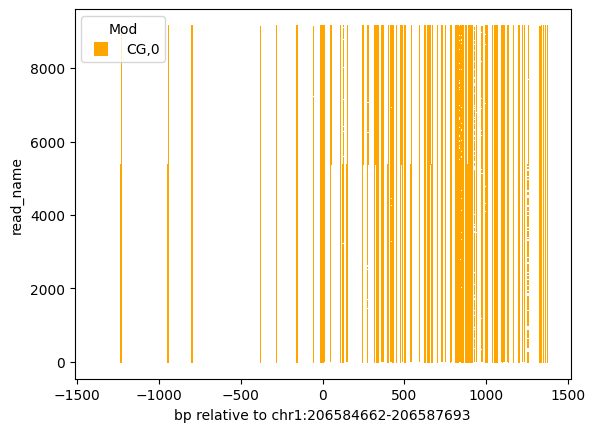

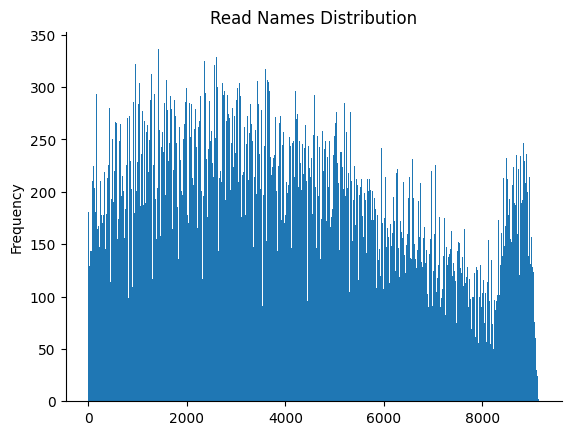

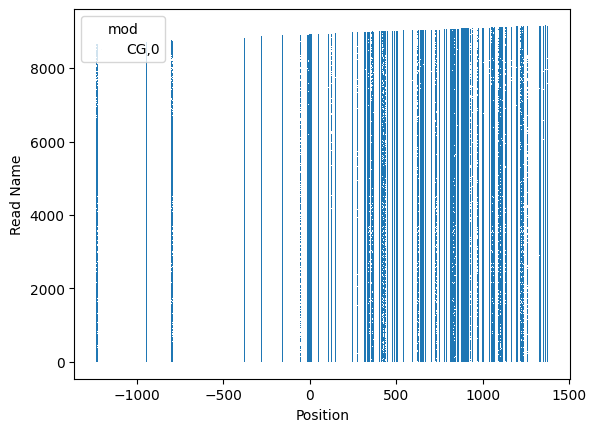

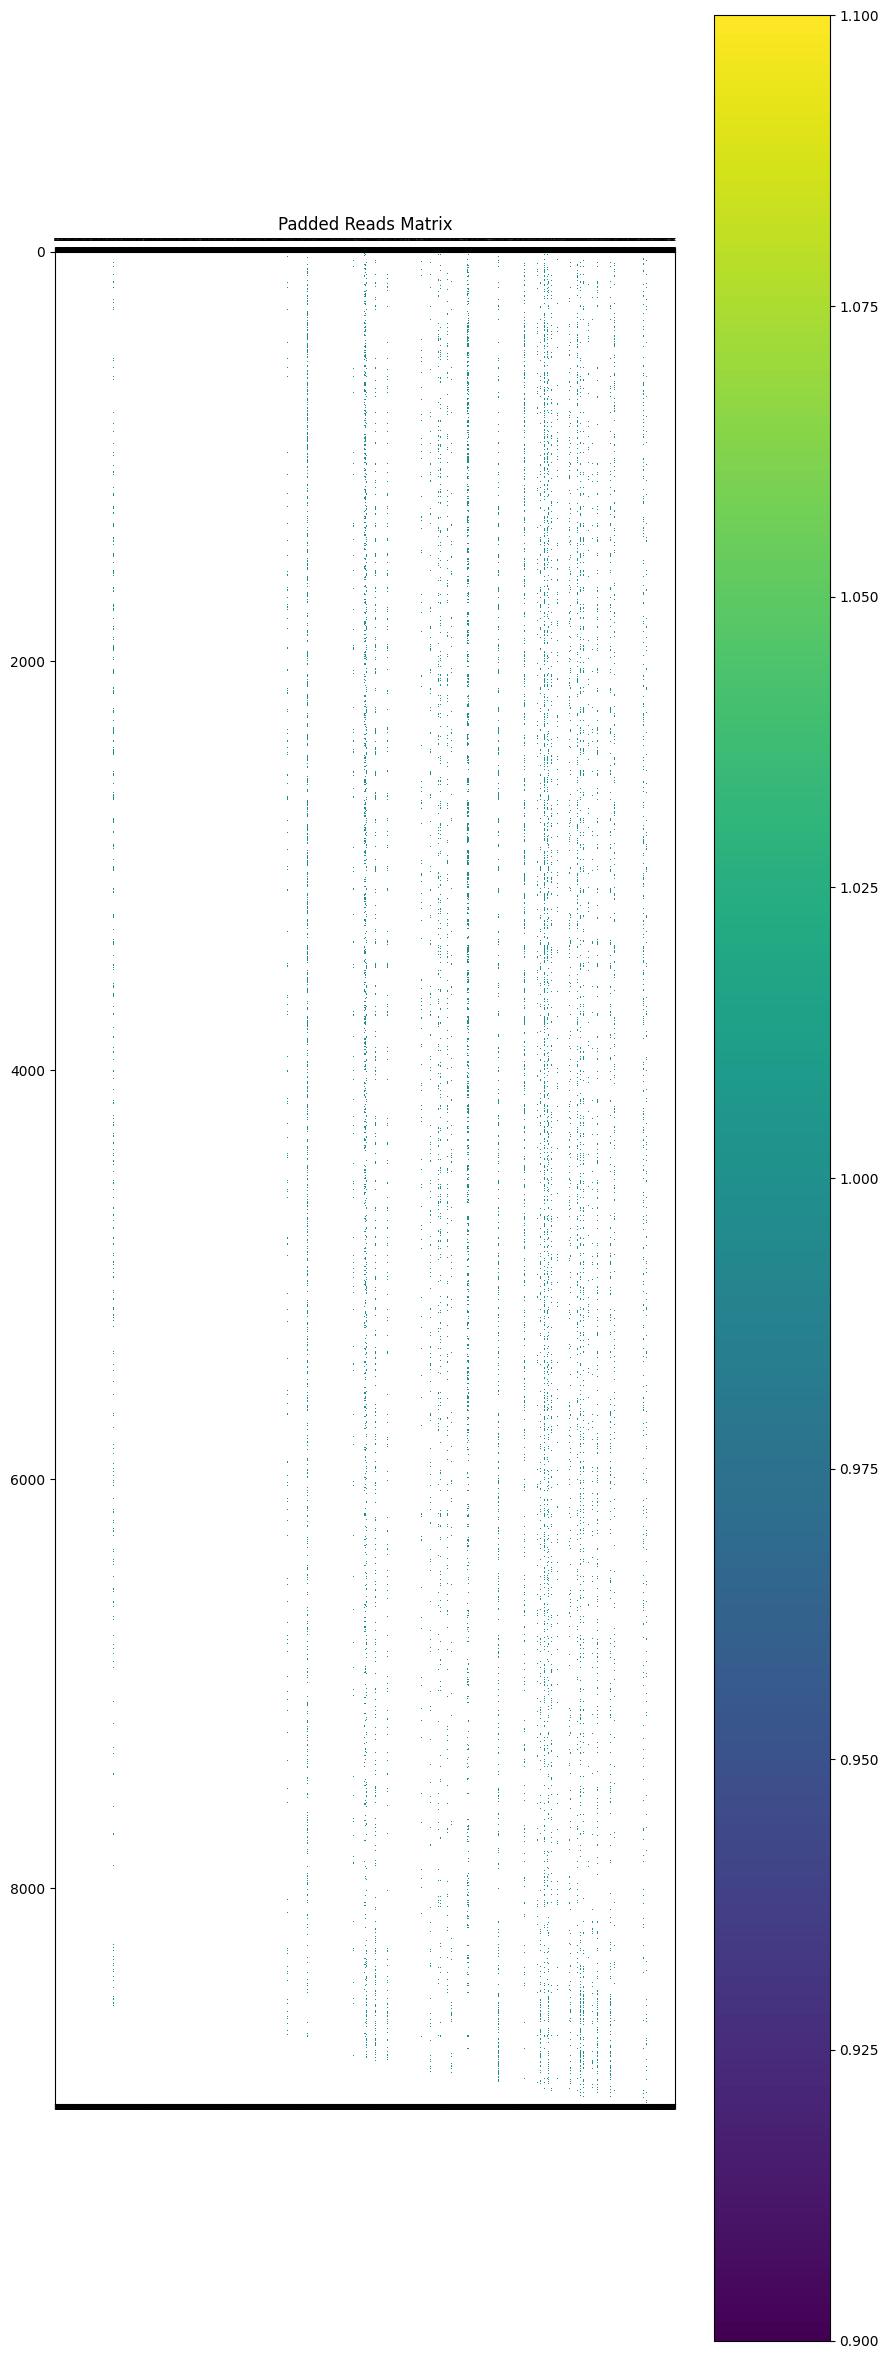

Padded reads saved to padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy


In [10]:
system_info()

experiment_name = "silenced_T_primerES_nCATS"
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

In [11]:
save_padded_reads_name_np

'padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy'

Padded reads loaded successfully.


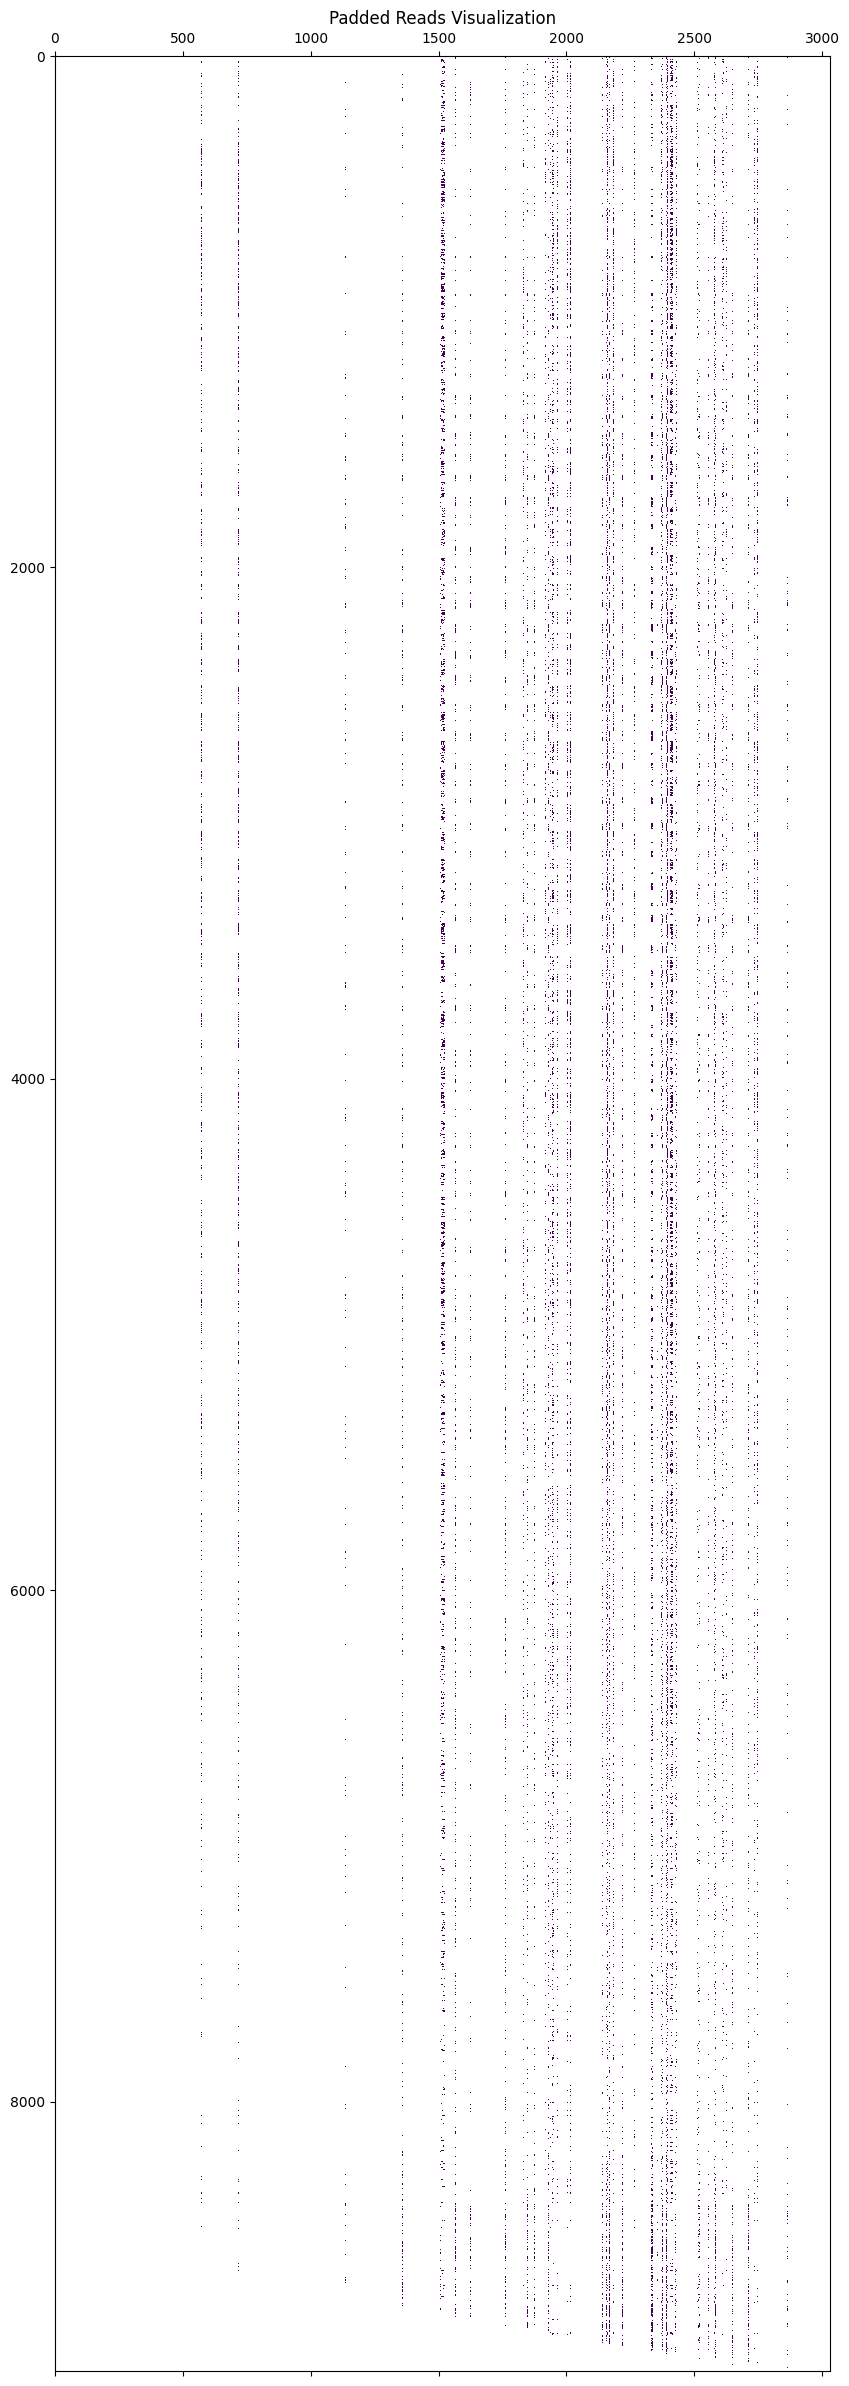

Visualization completed.
Region length: 3031
TAATGCTACCTTGCCTTTCACACCAATTCTGTGAGCCCAAGCAGGAATGAAGATTACCTATCTCTAATGGCAGGACAGAAGGGAGTGGTGGTTAAGGTTACTGGAGGTTATTGGGGGAATAAATGAAGACCTCATGCCACTTCTAAACACTGCCAGGACCTAACATACCTTGTGTTTTTATATCCAATATGGGAGTAAAGGTTAGATATTTTAACATCAAATATGAGGATGACACTAGATGGTTTTAAAAGCCCCCCACCATAACTTCTAAACTCCACAATGTTCGAATATTGTTAGGTTTCAGTGAAATCCTACAGTAGTCCCTTGCTTGGAATCACTGTAGGATTGGCTCCAGCAATGGGCAACACAAGGTTTGGTTCTATACAGTAGGTATGGGTCAAAGAAAATGCTATGATTGAAAAATTGCTGTTTTCCTCCTCAAAAAGCTCATACCAACCAGGAAAGAGCTATCAGAAAACCTTCAGGAAAGAATATAATGATAGGATATAACAAATACCCCCACAGCTGGTCCATAGACCAAAGTATAATTCCAAGTAGGGAATTTCACTTAACGAGGTAAGGCATTTAAGGGAAAAGGAATCTAGGCTAGGACTCTGCTAGCCAGACCCAGATAAATTATTACAGGGAAGCATGTTCTTGAGGCTATTCTCTATGAAGAAGGGCAACCCACCTTGCCATCTATATCCTTTCTGTTTTCGACAGGGGTGGTCCTAAGCTGGATAGATCTTTACTCTGACCAGTACCATATAGGTCTGTGGTTCTCAAACCTGGCTGCACAGTGTGGCACTTTAAGTAATCCTGATACCCAGTCCCATCCCCAAAGATGCTGATTTAATTTGTCTAAGGTGCAGTTTGGGCCTCTGGATTGGAACCAACCCATATACCCATCAATGATAGACTGGATAAAGAAAATGTGGCACATATACACCATAGA

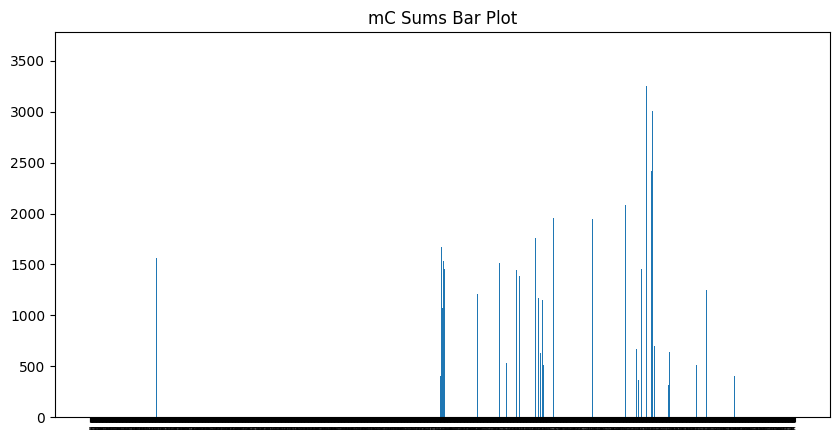

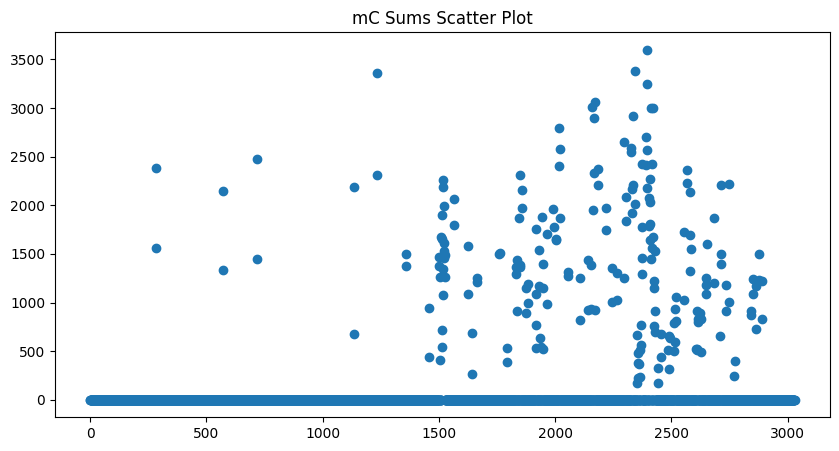

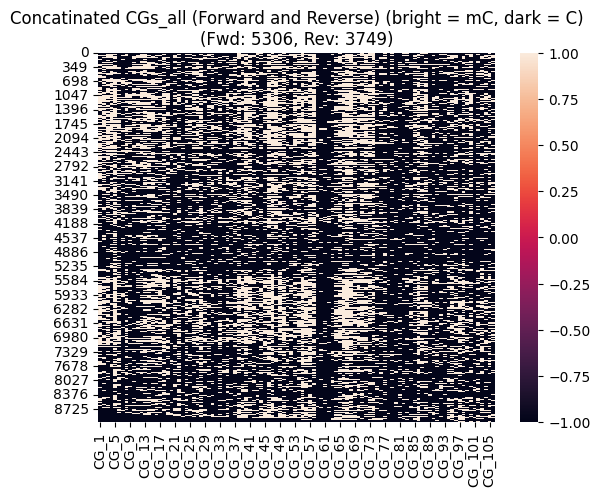

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


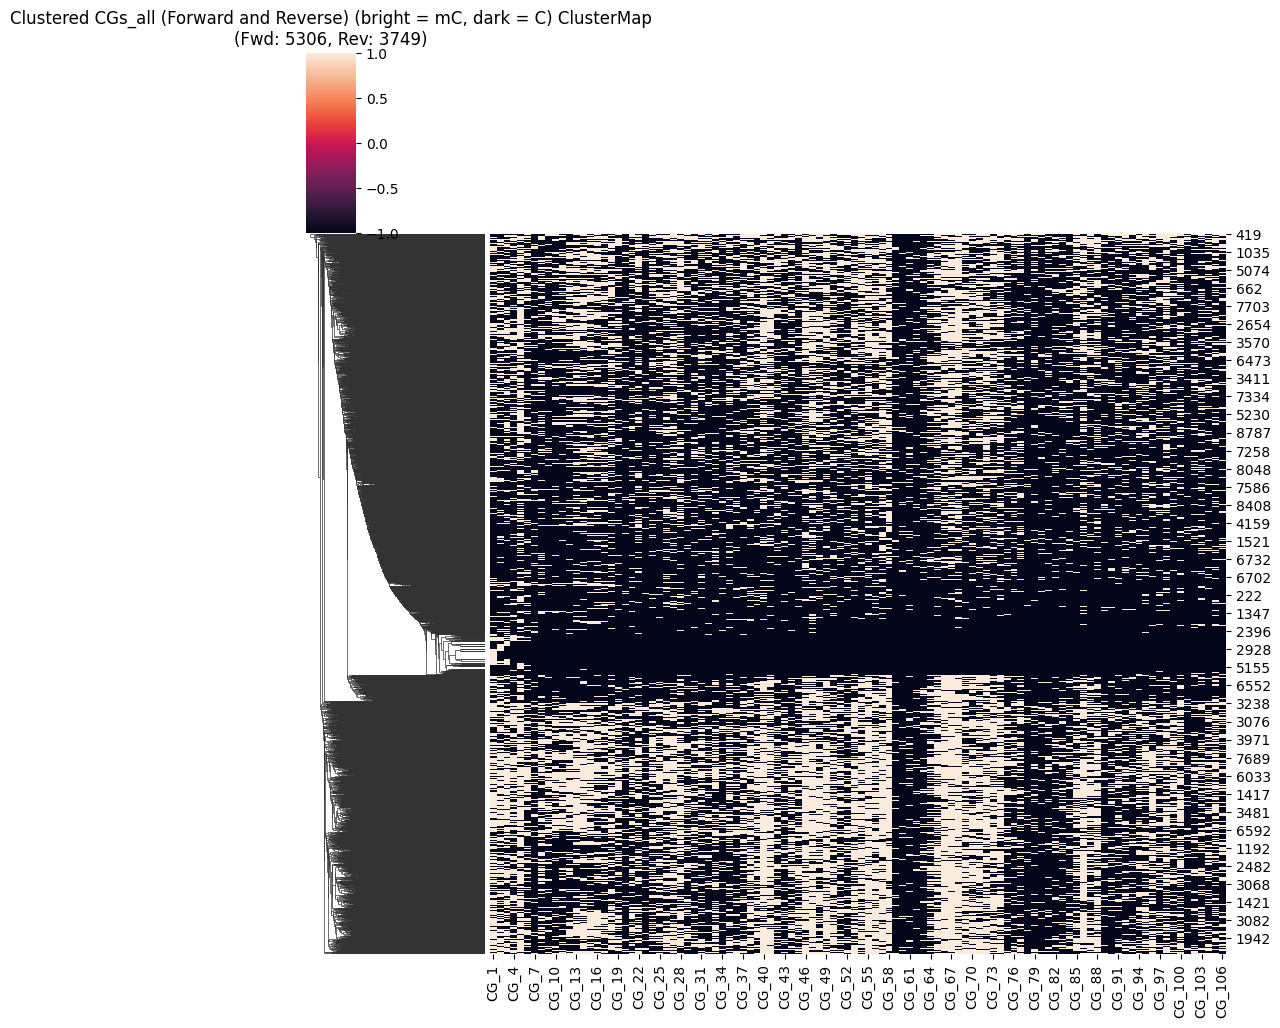

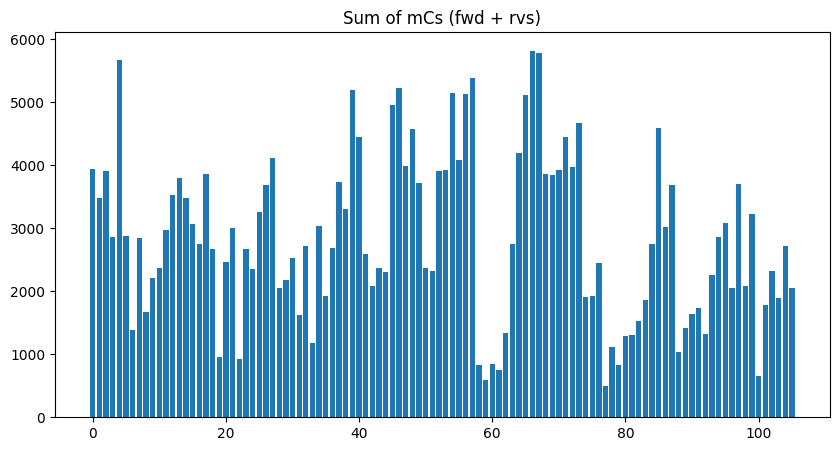

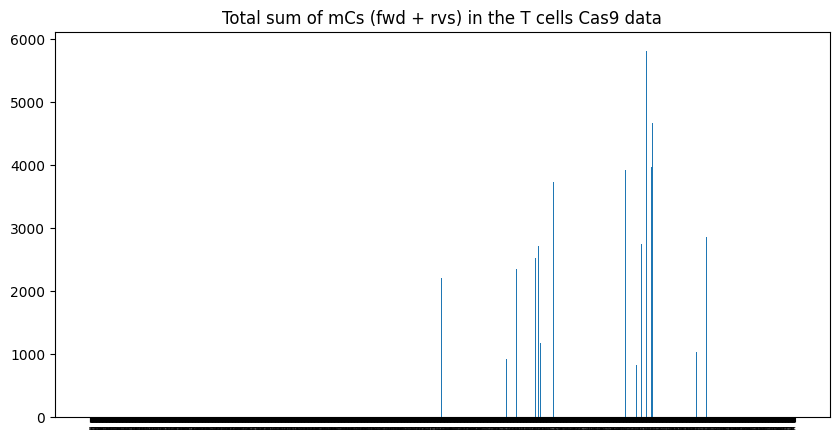

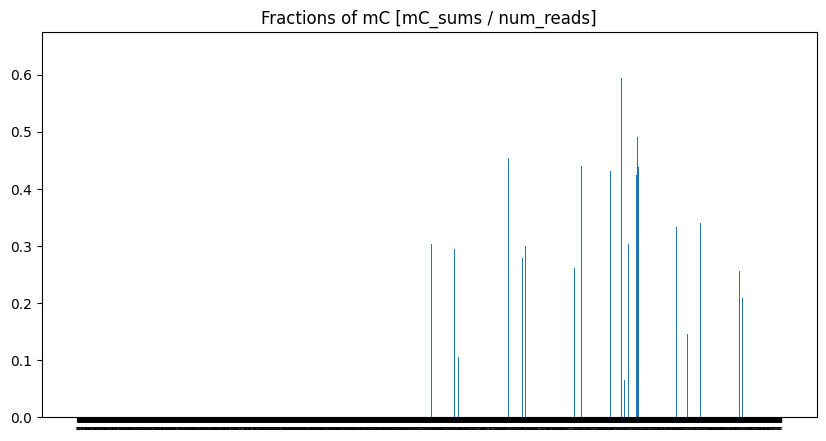

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


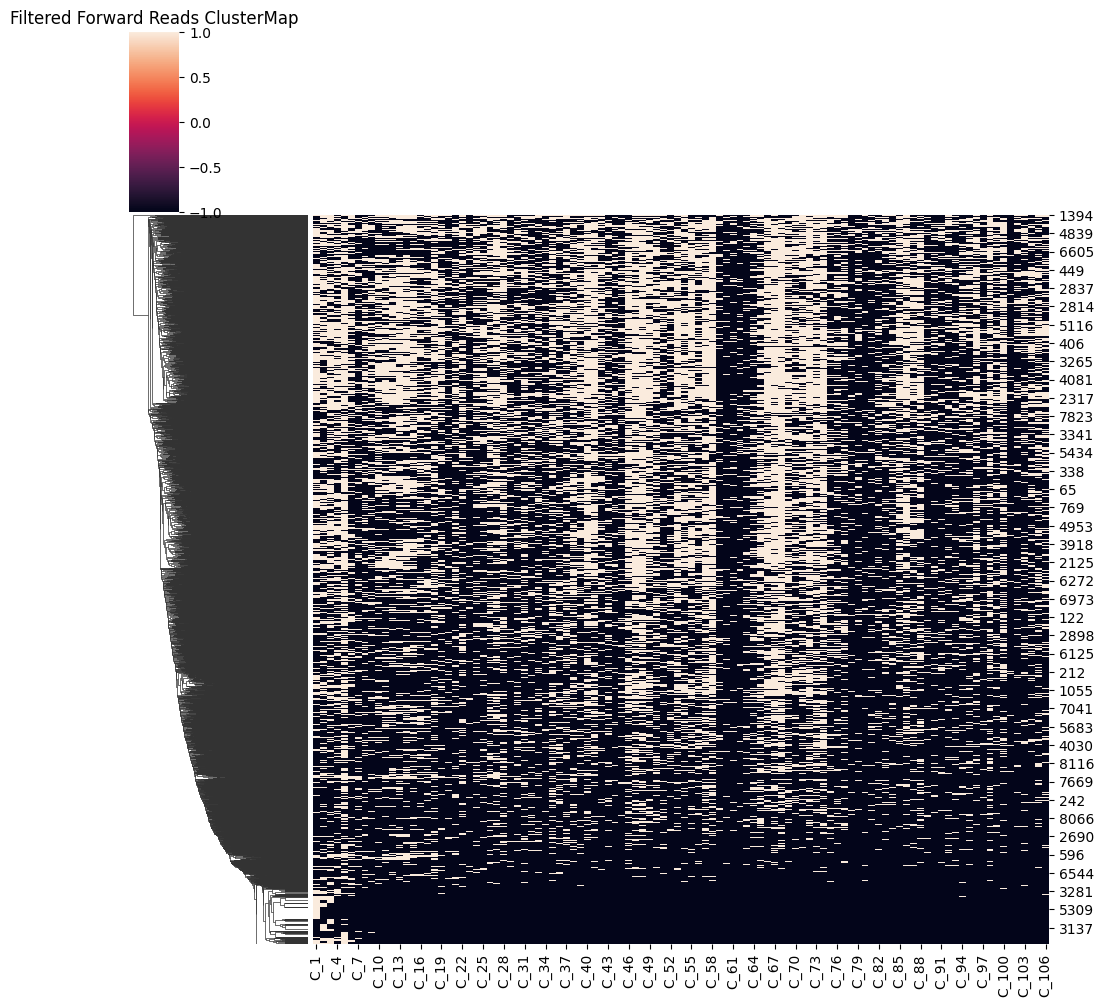

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


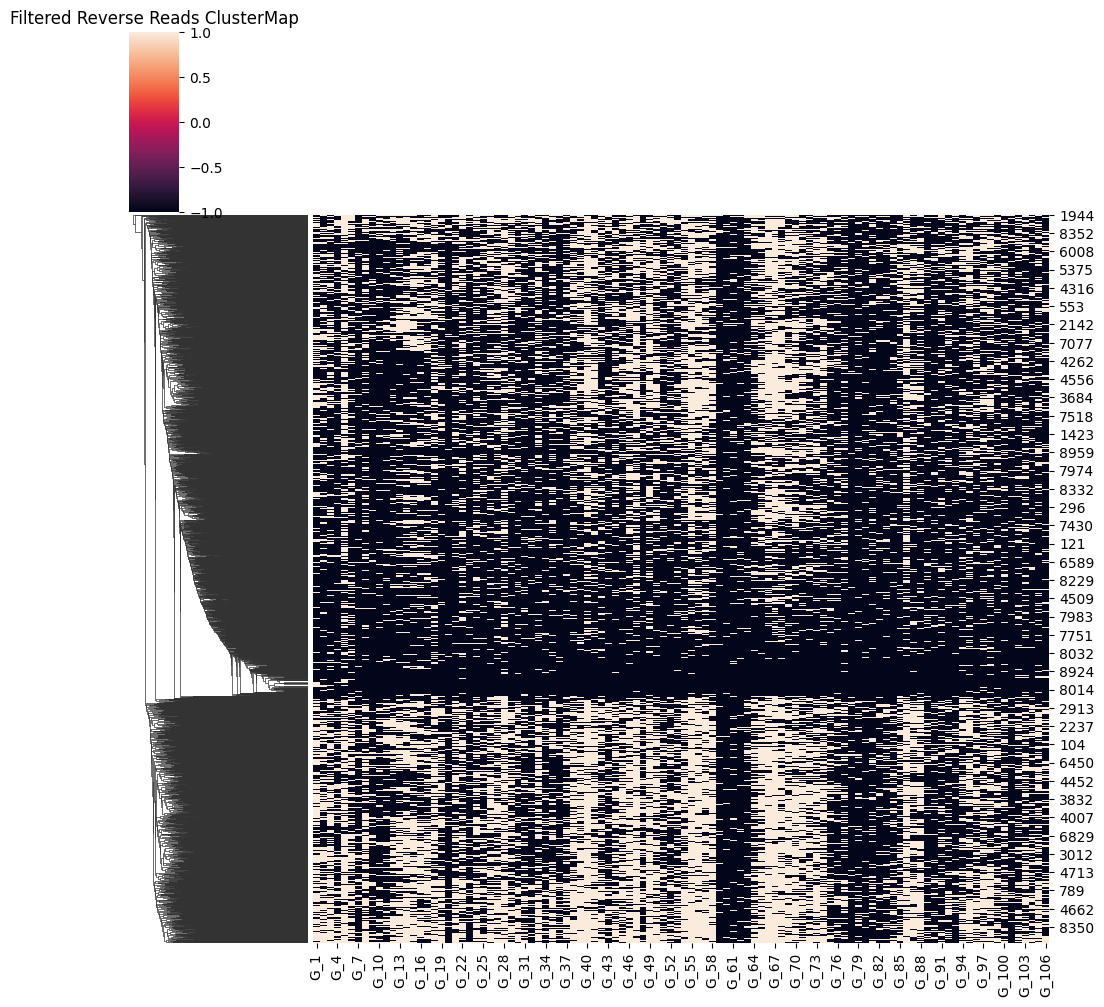

CGs_all saved as CG_106_units_combined_silenced_T_primerES_nCATS_numFWD5306_numRVS3749_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [12]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silenced CRISPROff primary T cells from ES:
From around 7644 reads located near the ROI, 

 ~7097 reads have non-zery mC 
 
 (with 90% confidance in at least one methylated C the mC calls ) 


Forward reads: 3852

Reverse reads: 2805 


In comparison to the 70% condidance reads:

Forward reads: 4132

Reverse reads: 2965


~ 90% of those Day 6 CRISPROff cells are silenced according to Elaines Flow data

# #TODOs / Ideas
- look through each dataset
- try various confidence in mC thresholds
- try extanding to londer regions than my 30 bps [Done!]
